# Exploratory Data Analysis (EDA): Premier League

### Autor: Juan José Fernández Moreno

---

### **Introducción**
En este análisis exploratorio, profundizaremos en las estadísticas y el rendimiento de los equipos de la Premier League, enfocándonos en los aspectos clave que definen su desempeño durante la temporada.  


---

### **Extracción y tratamiento de los datos**
El tratamiento de los datos iniciales se encuentra en la siguiente ruta: ***src/notebooks/notebook_eda_inicial.ipynb***  

En dicho notebook, se carga el dataset principal (en la ruta *src/data/PremierLeague.csv*) sobre el que se trabaja para extraer los datos que nos servirán para realizar los análisis en este documento. Las tareas principales que se han llevado a cabo son:  

- Visualización previa de los datos, conversión y limpieza de algunas columnas.  
- Filtrado del dataframe para extraer los datos que se van a analizar (*temporada 2023/2024*).
- Creación de 3 nuevos datasets en formato .csv, que serán los utilizados en este notebook para las visualizaciones y estadísticas. Estos dataset se encuentran en la misma ruta que el principal, en *src/data/*  


---

### **Visualización y Estadísticas**
En este notebook, se utilizan herramientas de visualización para representar datos relevantes y comprender mejor el impacto de métricas clave, como:  
- Rendimiento como local y visitante.  
- Goles anotados y recibidos.  
- Rentabilidad de los equipos.  
- Otros indicadores como tiros, corners y tarjetas.  
- La relación entre todos ellos con la clasificación final obtenida, representada a través de los puntos.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import sys

sys.path.append(os.path.abspath("src/utils/"))
import functions as fb

In [2]:
resultados_en_casa = pd.read_csv("./src/data/pl_23_24_home.csv")
resultados_como_visitante = pd.read_csv("./src/data/pl_23_24_away.csv")
resultados_totales = pd.read_csv("./src/data/pl_23_24_generic.csv")

In [19]:
resultados_totales

,Equipo,Victorias,Empates,Derrotas,Puntos,GolesAnotados,GolesRecibidos,GolesDescansoAnotados,GolesDescansoRecibidos,TirosRealizados,...,CornersEnContra,FaltasCometidas,FaltasRecibidas,AmarillasPropias,AmarillasRival,RojasPropias,RojasRival,GoalAverage,Punteria,Efectividad
0,Man City,28,7,3,91,96,34,40.0,16.0,690.0,...,133.0,287.0,421.0,51.0,90.0,2.0,2.0,62,40.289855,34.532374
1,Arsenal,28,5,5,89,91,29,42.0,12.0,657.0,...,113.0,391.0,407.0,62.0,77.0,2.0,2.0,62,34.550989,40.088106
2,Liverpool,24,10,4,82,86,41,32.0,21.0,790.0,...,152.0,462.0,392.0,65.0,91.0,5.0,4.0,45,35.063291,31.046931
3,Aston Villa,20,8,10,68,76,61,36.0,21.0,514.0,...,161.0,413.0,483.0,94.0,90.0,2.0,3.0,15,36.964981,40.000000
4,Tottenham,20,6,12,66,74,61,26.0,30.0,582.0,...,236.0,425.0,530.0,88.0,96.0,4.0,4.0,13,36.769759,34.579439
5,Chelsea,18,9,11,63,77,63,37.0,23.0,548.0,...,191.0,445.0,464.0,104.0,93.0,3.0,4.0,14,39.233577,35.813953
6,Man United,18,6,14,60,57,58,22.0,23.0,550.0,...,279.0,398.0,352.0,80.0,84.0,1.0,1.0,-1,35.090909,29.533679
7,Newcastle,18,6,14,60,85,62,37.0,23.0,551.0,...,195.0,385.0,482.0,76.0,94.0,1.0,3.0,23,38.656987,39.906103
8,West Ham,14,10,14,52,60,74,25.0,34.0,450.0,...,229.0,390.0,407.0,76.0,69.0,3.0,2.0,-14,33.333333,40.000000
9,Crystal Palace,13,10,15,49,57,58,24.0,19.0,456.0,...,198.0,456.0,440.0,69.0,76.0,2.0,2.0,-1,37.061404,33.727811


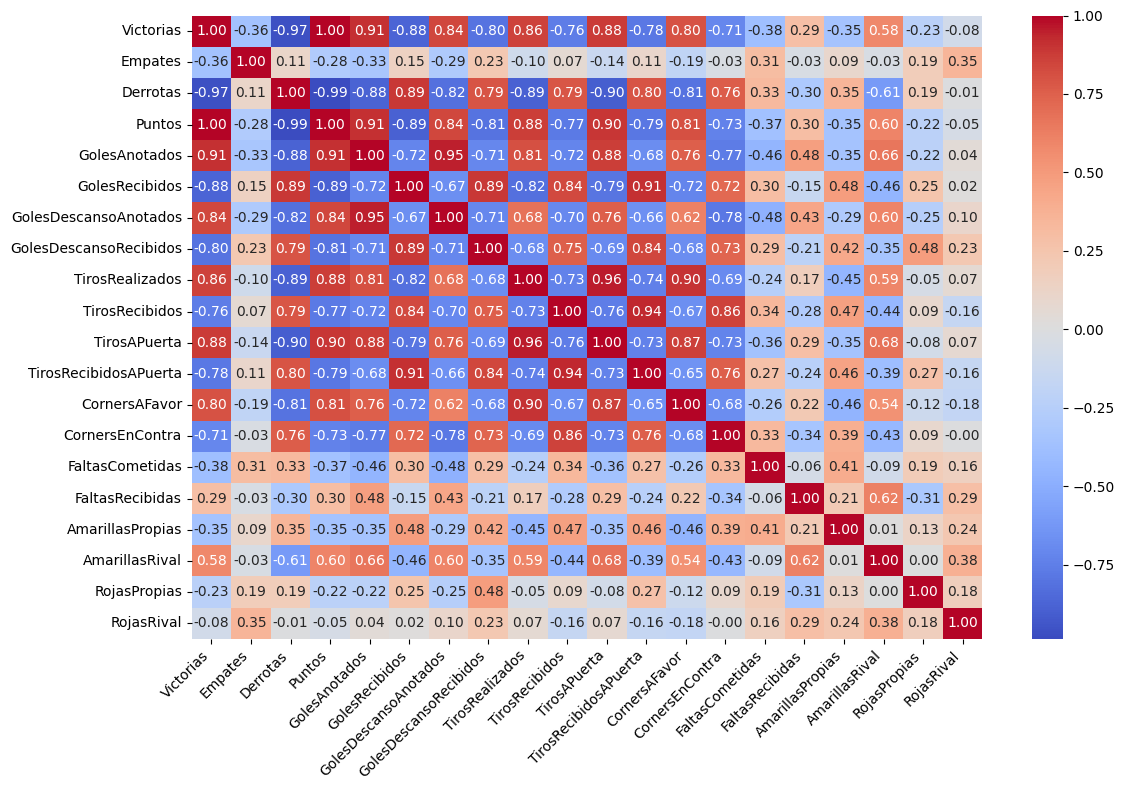

In [4]:
# Primer vistazo de los dataframes con la matriz de correlación
numericas = resultados_totales.select_dtypes(include=['float64', 'int64'])
correlacion = numericas.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlacion, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### PRIMERAS IMPRESIONES  
Se puede observar que tanto los puntos como las victorias tienen bastante relación con goles anotados, tiros y tiros a puerta realizados y corners a favor. Esto es lógico pensarlo, y es una de las hipótesis, ya que los equipos más ofensivos y que consiguen más disparos que el rival tienen una mayor posibilidad de anotar goles y, por tanto, de conseguir victorias y sumar más puntos.  
También se observa la misma relación entre las derrotas con los goles y disparos recibidos y con los corners en contra.  

Analizaremos las principales estadísticas, en especial las que más correlación parecen tener con los puntos conseguidos, que serán:  

- Rendimiento de los equipos como local y visitante
- Goal average o la diferencia entre goles a favor y en contra  
- Relevancia de los goles en el primer y segundo tiempo  
- Tiros o potencial ofensivo  
- Corners  
- Fairplay, si influyen las tarjetas en los puntos conseguidos y cómo

Pero antes, vamos a crear 3 columnas, en cada dataframe, que serán necesarias para los análisis.

In [3]:
# El GoalAverage que es la diferencia entre los goles marcados y los goles recibidos
resultados_en_casa["GoalAverage"] = resultados_en_casa.GolesAnotados - resultados_en_casa.GolesRecibidos
resultados_como_visitante["GoalAverage"] = resultados_como_visitante.GolesAnotados - resultados_como_visitante.GolesRecibidos
resultados_totales["GoalAverage"] = resultados_totales.GolesAnotados - resultados_totales.GolesRecibidos

# La puntería, donde se medirá qué porcentaje de los tiros totales van entre los tres palos
resultados_en_casa["Punteria"] = resultados_en_casa.TirosAPuerta / resultados_en_casa.TirosRealizados * 100
resultados_como_visitante["Punteria"] = resultados_como_visitante.TirosAPuerta / resultados_como_visitante.TirosRealizados * 100
resultados_totales["Punteria"] = resultados_totales.TirosAPuerta / resultados_totales.TirosRealizados * 100

# La efectividad es el porcentaje de goles marcados sobre los tiros a puerta realizados
resultados_en_casa["Efectividad"] = resultados_en_casa.GolesAnotados / resultados_en_casa.TirosAPuerta * 100
resultados_como_visitante["Efectividad"] = resultados_como_visitante.GolesAnotados / resultados_como_visitante.TirosAPuerta * 100
resultados_totales["Efectividad"] = resultados_totales.GolesAnotados / resultados_totales.TirosAPuerta * 100

### Rendimiento de equipos locales vs visitantes
**¿El rendimiento como local sigue siendo significativamente superior al de visitante?**

In [6]:
columnas_interes = ['Victorias', 'Empates', 'Derrotas', 'Puntos']

df_casa = resultados_en_casa[columnas_interes]
df_visitante = resultados_como_visitante[columnas_interes]

describe_casa = df_casa.describe()
describe_visitante = df_visitante.describe()

describe_casa.columns = [f"{col}_casa" for col in describe_casa.columns]
describe_visitante.columns = [f"{col}_visitante" for col in describe_visitante.columns]

comparacion_describe = pd.concat([describe_casa, describe_visitante], axis=1)

columnas_alternadas = []
for col in columnas_interes:
    columnas_alternadas.extend([f"{col}_casa", f"{col}_visitante"])

comparacion_describe = comparacion_describe[columnas_alternadas]

comparacion_describe_T = comparacion_describe.T
comparacion_describe_T

,count,mean,std,min,25%,50%,75%,max
Victorias_casa,20.0,8.75,3.985170,2.0,6.50,8.0,12.00,15.0
Victorias_visitante,20.0,6.15,3.232646,1.0,4.00,5.5,7.25,14.0
Empates_casa,20.0,4.10,1.803505,0.0,3.00,4.0,5.00,8.0
Empates_visitante,20.0,4.10,1.586124,2.0,3.00,4.0,5.25,7.0
Derrotas_casa,20.0,6.15,3.602265,0.0,3.75,6.0,8.00,13.0
Derrotas_visitante,20.0,8.75,3.258592,3.0,7.00,9.0,11.00,15.0
Puntos_casa,20.0,30.35,11.301025,10.0,25.75,29.0,39.25,48.0
Puntos_visitante,20.0,22.55,9.461696,6.0,17.75,20.5,27.00,44.0


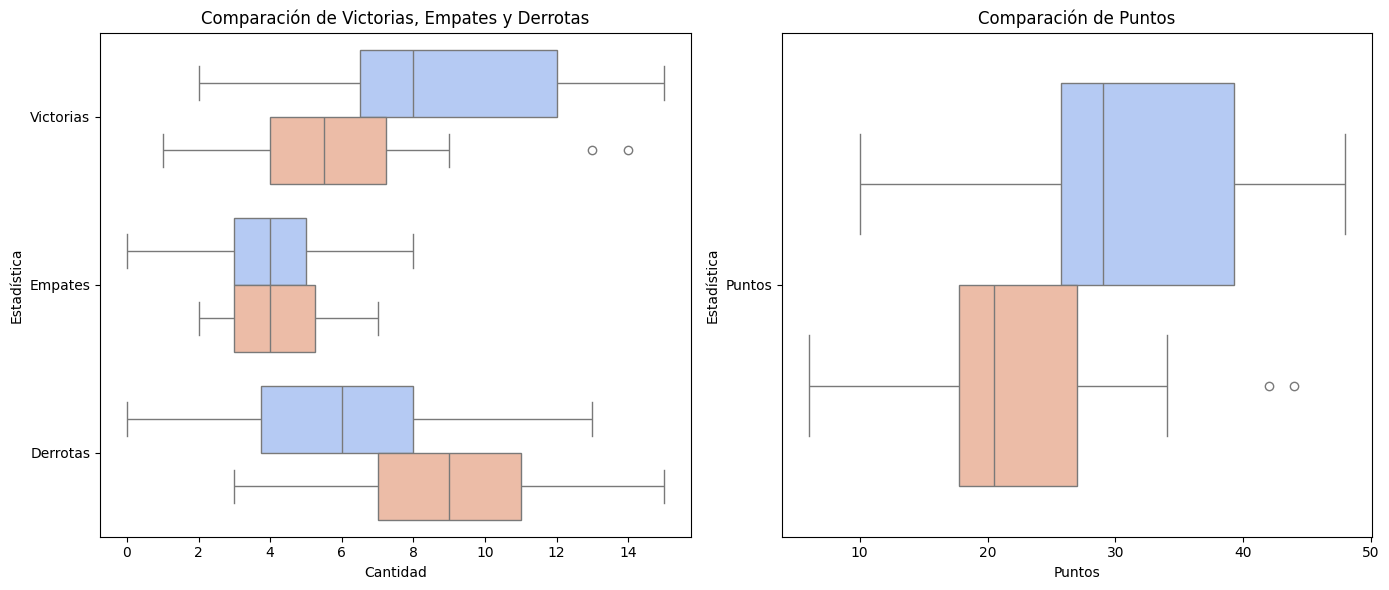

In [7]:
# Con este gráfico, se muestra la relación entre los resultados jugando como local (color azul) y como visitante (color naranja)
# En el gráfico de la derecha, se muestra la comparativa de puntos conseguidos como local y como visitante (mismos colores)

columnas_victorias_empates_derrotas = ['Victorias', 'Empates', 'Derrotas']
columnas_puntos = ['Puntos']

df_casa = resultados_en_casa[columnas_victorias_empates_derrotas + columnas_puntos].copy()
df_casa['Tipo'] = 'Casa'

df_visitante = resultados_como_visitante[columnas_victorias_empates_derrotas + columnas_puntos].copy()
df_visitante['Tipo'] = 'Visitante'

df_combinado = pd.concat([df_casa, df_visitante])

df_long_victorias = pd.melt(df_combinado, id_vars='Tipo', value_vars=columnas_victorias_empates_derrotas,
                            var_name='Estadística', value_name='Valor')

df_long_puntos = pd.melt(df_combinado, id_vars='Tipo', value_vars=columnas_puntos,
                         var_name='Estadística', value_name='Valor')


fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(x='Valor', y='Estadística', hue='Tipo', data=df_long_victorias, ax=axes[0], palette="coolwarm")
axes[0].set_title("Comparación de Victorias, Empates y Derrotas")
axes[0].set_xlabel("Cantidad")
axes[0].legend_.remove() 

sns.boxplot(x='Valor', y='Estadística', hue='Tipo', data=df_long_puntos, ax=axes[1], palette="coolwarm")
axes[1].set_title("Comparación de Puntos")
axes[1].set_xlabel("Puntos")
axes[1].legend_.remove() 

plt.tight_layout()
plt.show()

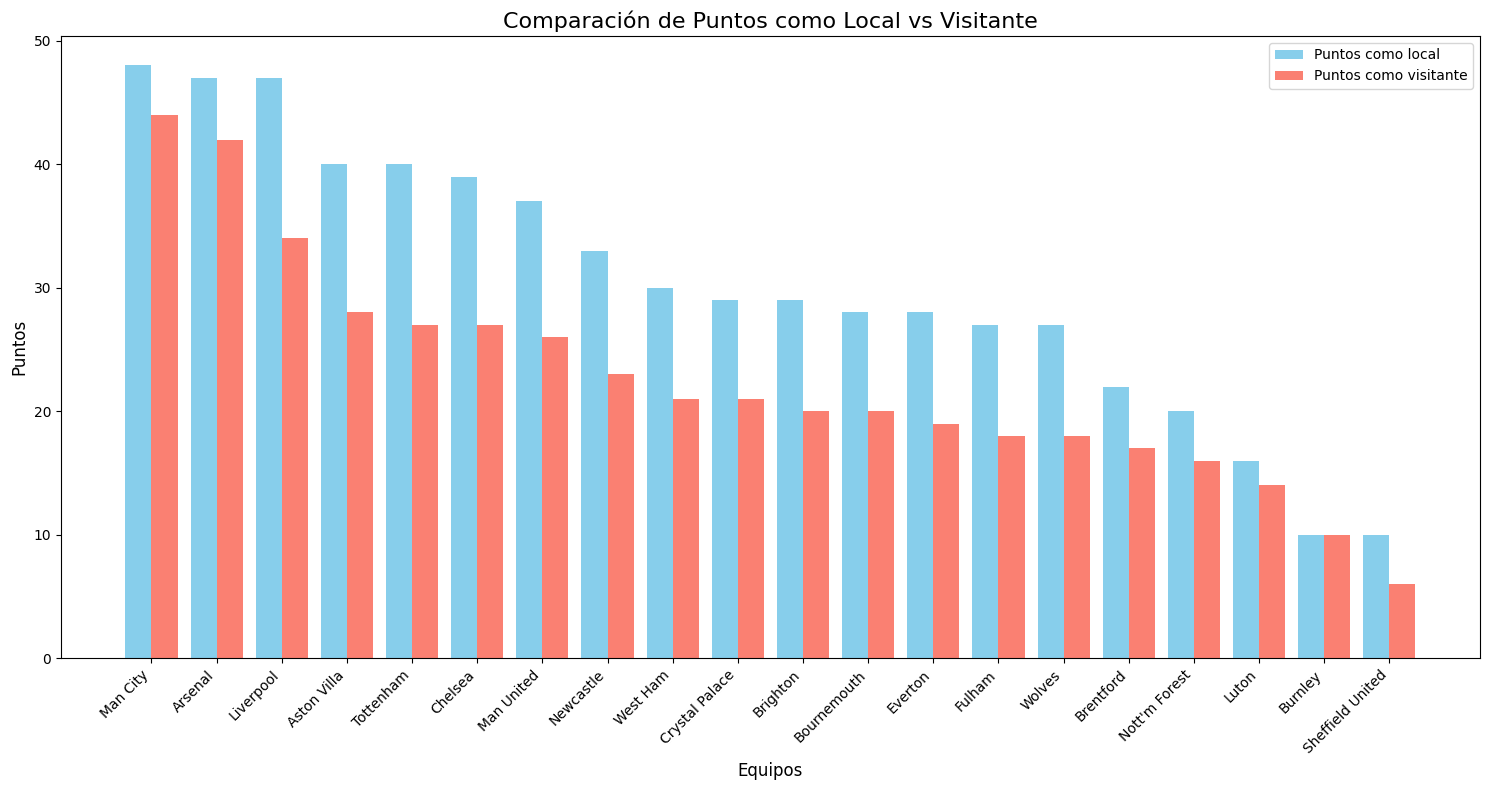

In [8]:
# Gráfico para comparar el rendimiento como local y como visitante de los equipos
equipos = resultados_totales.Equipo
puntos_local = resultados_en_casa["Puntos"]
puntos_visitante = resultados_como_visitante["Puntos"]

x = np.arange(len(equipos))
width = 0.4

plt.figure(figsize=(15, 8))
plt.bar(x - width / 2, puntos_local, width, label='Puntos como local', color='skyblue')
plt.bar(x + width / 2, puntos_visitante, width, label='Puntos como visitante', color='salmon')

plt.xlabel("Equipos", fontsize=12)
plt.ylabel("Puntos", fontsize=12)
plt.title("Comparación de Puntos como Local vs Visitante", fontsize=16)
plt.xticks(x, equipos, rotation=45, ha="right", fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()

In [87]:
# Calculamos la diferencia entre la media en casa con la media de visitante y la comparamos con la media total.
# Con esto quiero calcular cuánto mayor es el rendimiento en casa que como visitante.
(resultados_en_casa.Puntos.describe()["mean"] - resultados_como_visitante.Puntos.describe()["mean"]) * 100 / resultados_totales.Puntos.describe()["mean"]

np.float64(14.744801512287337)

In [89]:
# Diferencia de puntos totales de local y de visitante
resultados_en_casa.Puntos.sum() - resultados_como_visitante.Puntos.sum()

np.int64(156)

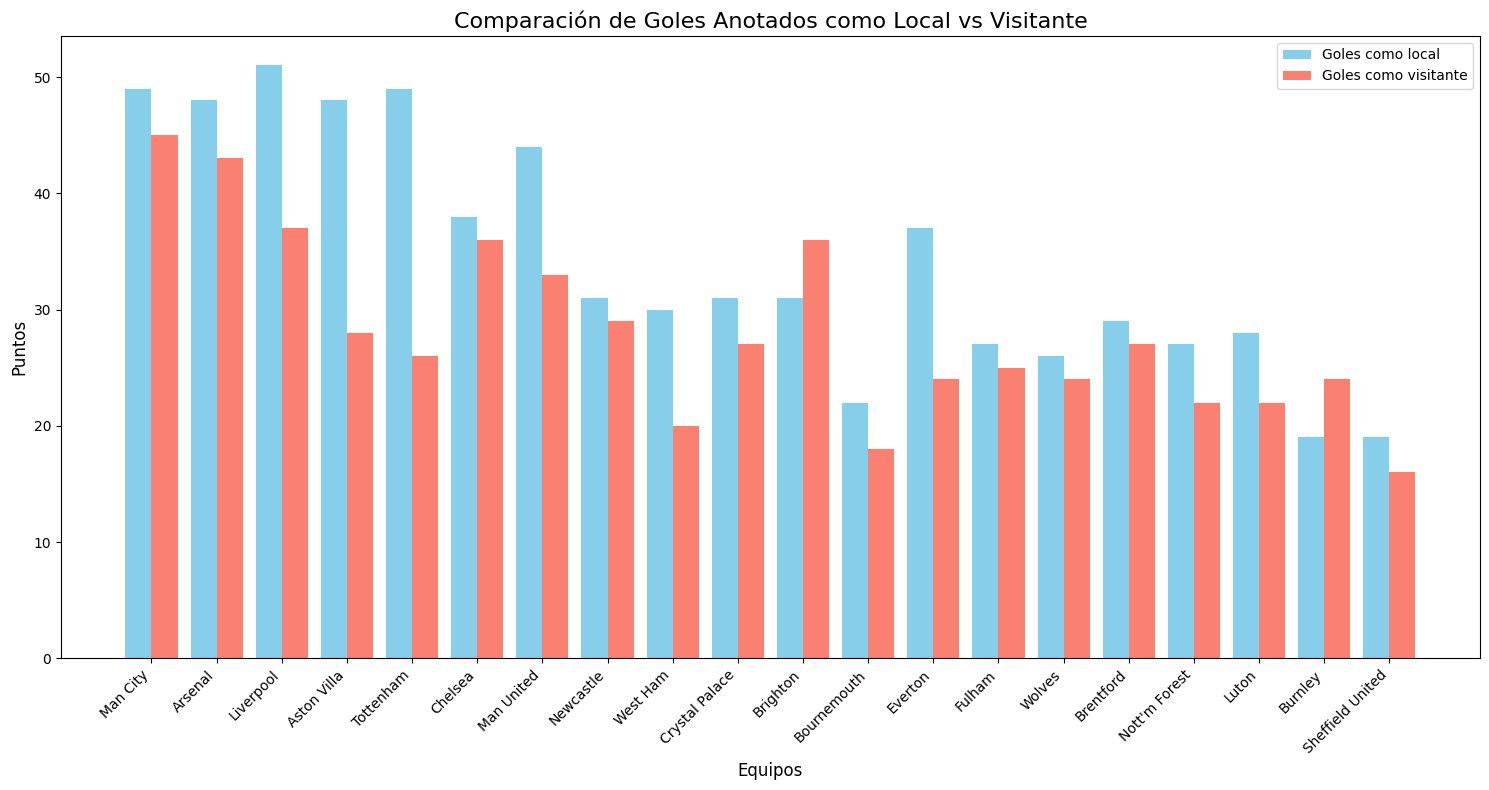

In [9]:
equipos = resultados_totales.Equipo
goles_local = resultados_en_casa["GolesAnotados"]
goles_visitante = resultados_como_visitante["GolesAnotados"]

x = np.arange(len(equipos))
width = 0.4

plt.figure(figsize=(15, 8))
plt.bar(x - width / 2, goles_local, width, label='Goles como local', color='skyblue')
plt.bar(x + width / 2, goles_visitante, width, label='Goles como visitante', color='salmon')

plt.xlabel("Equipos", fontsize=12)
plt.ylabel("Puntos", fontsize=12)
plt.title("Comparación de Goles Anotados como Local vs Visitante", fontsize=16)
plt.xticks(x, equipos, rotation=45, ha="right", fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()

In [78]:
# % total de diferencia de goles anotados en casa y como visitante
(resultados_en_casa.GolesAnotados.describe()["mean"] - resultados_como_visitante.GolesAnotados.describe()["mean"]) * 100 / resultados_totales.GolesAnotados.describe()["mean"]

np.float64(9.791332263242378)

In [82]:
# Diferencia entre los goles totales marcados en casa y como visitante
(resultados_en_casa.GolesAnotados.sum() - resultados_como_visitante.GolesAnotados.sum())

np.int64(122)

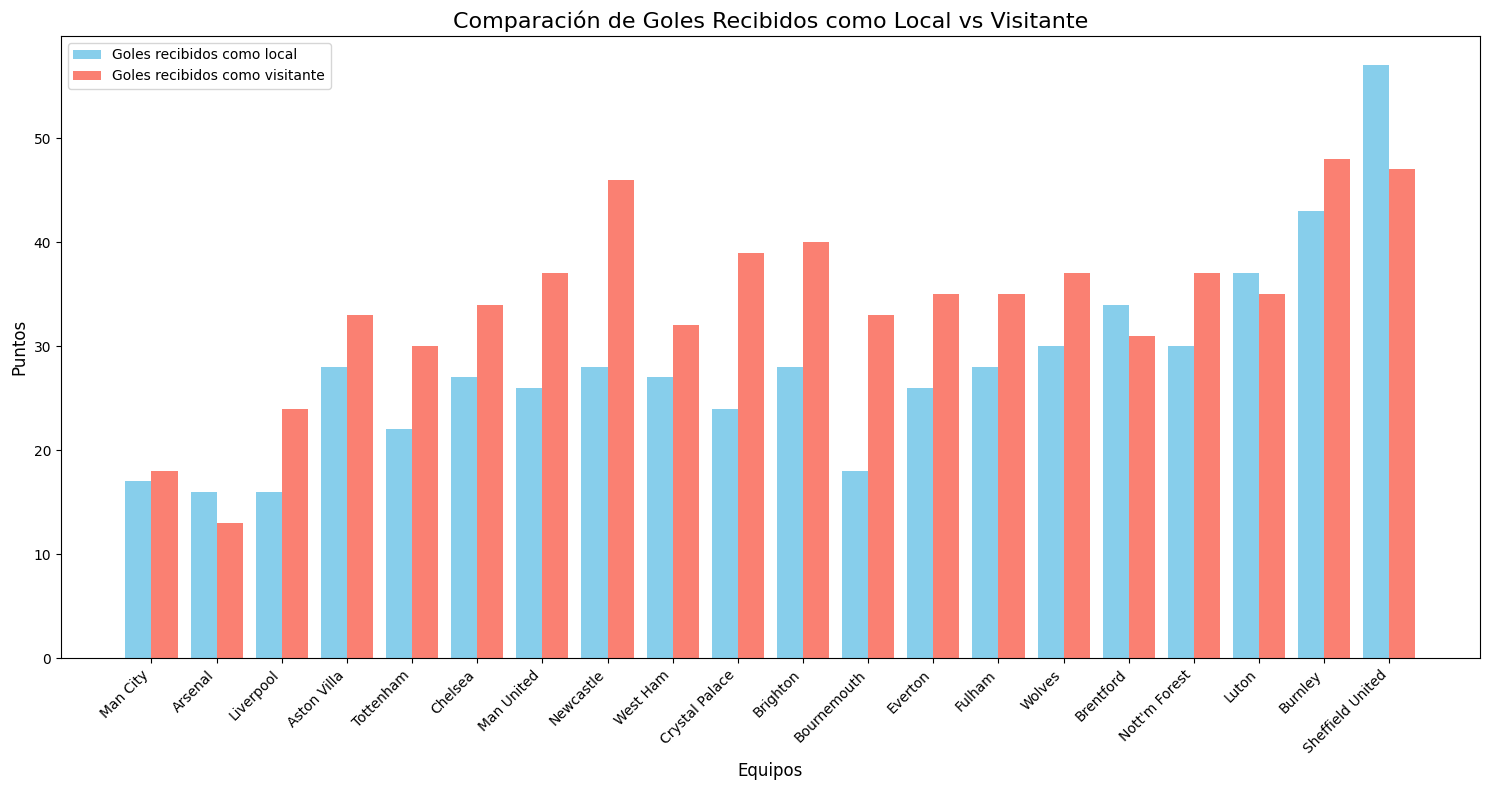

In [10]:
equipos = resultados_totales.Equipo
goles_encajados_local = resultados_en_casa["GolesRecibidos"]
goles_encajados_visitante = resultados_como_visitante["GolesRecibidos"]

x = np.arange(len(equipos))
width = 0.4

plt.figure(figsize=(15, 8))
plt.bar(x - width / 2, goles_encajados_local, width, label='Goles recibidos como local', color='skyblue')
plt.bar(x + width / 2, goles_encajados_visitante, width, label='Goles recibidos como visitante', color='salmon')

plt.xlabel("Equipos", fontsize=12)
plt.ylabel("Puntos", fontsize=12)
plt.title("Comparación de Goles Recibidos como Local vs Visitante", fontsize=16)
plt.xticks(x, equipos, rotation=45, ha="right", fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()

### Resultado  
Innegablemente, hay una diferencia de rendimiento de los equipos cuando juegan en casa y cuando juegan fuera de ella. Se podría decir que los equipos, cuando juegan de local, tienen un rendimiento **entre un 15% y un 17%** superior que cuando juegan a domicilio.  

Las estadísticas totales de los equipos (*resultados, puntos, goles a favor y en contra, disparos, corners...*) son superiores cuando se analizan los partidos de los equipos como local que como visitante.  

Además, tanto los puntos como los goles anotados son claramente superiores en la gran mayoría de equipos cuando juegan en casa que cuando tienen que jugar como visitantes.

### Goal average, goles a favor y en contra  
**¿Tiene relación el goal average en la clasificación de un equipo? ¿Es más importante el potencial ofensivo o el defensivo?** 

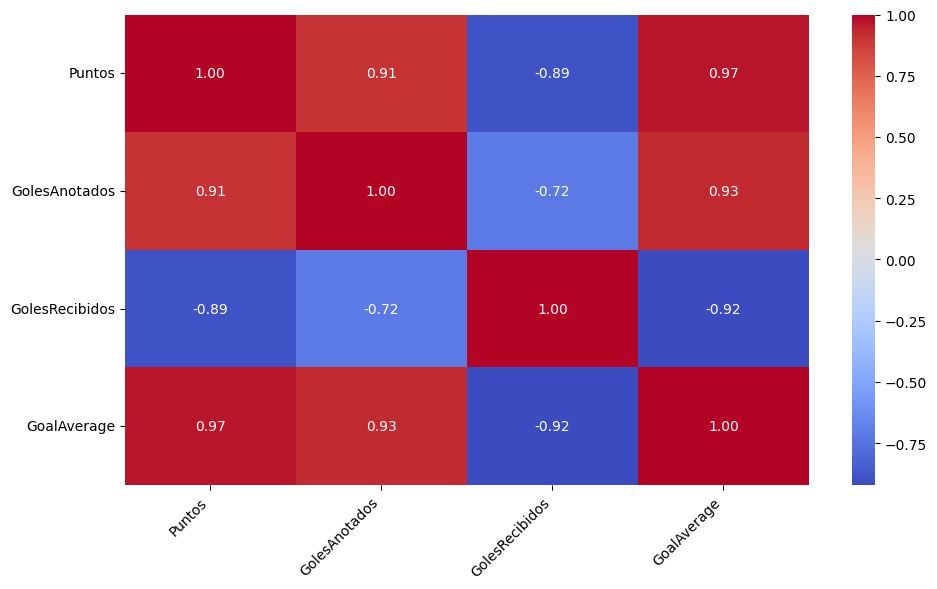

In [16]:
goal_average = resultados_totales[["Puntos","GolesAnotados","GolesRecibidos","GoalAverage"]]
correlacion = goal_average.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlacion, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

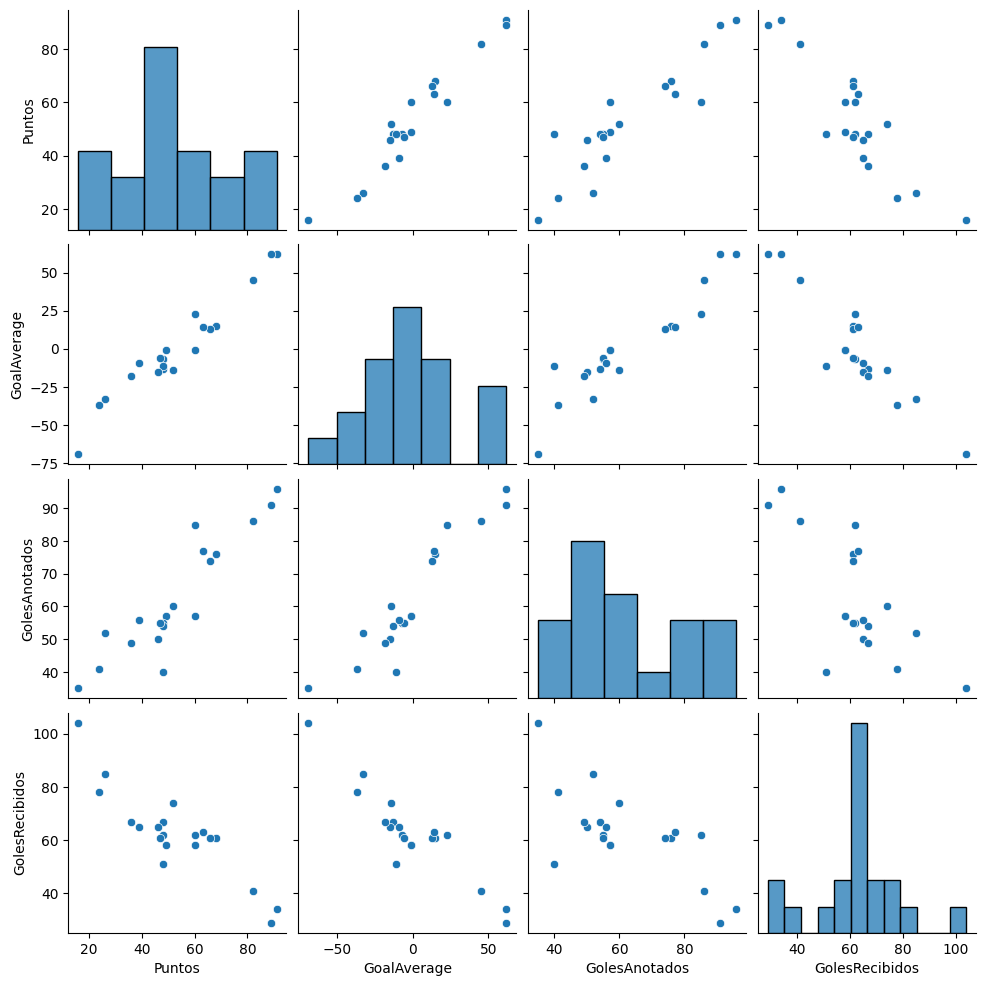

In [18]:
sns.pairplot(resultados_totales[['Puntos', 'GoalAverage', 'GolesAnotados', 'GolesRecibidos']])
plt.show()

In [60]:
goal_average_ranking = resultados_totales.sort_values("GoalAverage",ascending=False)
goal_ranking = resultados_totales.sort_values("GolesAnotados",ascending=False)
goal_r_ranking = resultados_totales.sort_values("GolesRecibidos",ascending=False)

In [43]:
goal_ranking[["Equipo", "Puntos","GolesAnotados"]]

,Equipo,Puntos,GolesAnotados
0,Man City,91,96
1,Arsenal,89,91
2,Liverpool,82,86
7,Newcastle,60,85
5,Chelsea,63,77
3,Aston Villa,68,76
4,Tottenham,66,74
8,West Ham,52,60
6,Man United,60,57
9,Crystal Palace,49,57


In [62]:
goal_r_ranking[["Equipo", "Puntos", "GolesRecibidos"]]

,Equipo,Puntos,GolesRecibidos
19,Sheffield United,16,104
17,Luton,26,85
18,Burnley,24,78
8,West Ham,52,74
16,Nott'm Forest,36,67
11,Bournemouth,48,67
15,Brentford,39,65
14,Wolves,46,65
5,Chelsea,63,63
7,Newcastle,60,62


In [61]:
goal_average_ranking[["Equipo", "Puntos","GoalAverage"]]

,Equipo,Puntos,GoalAverage
0,Man City,91,62
1,Arsenal,89,62
2,Liverpool,82,45
7,Newcastle,60,23
3,Aston Villa,68,15
5,Chelsea,63,14
4,Tottenham,66,13
6,Man United,60,-1
9,Crystal Palace,49,-1
13,Fulham,47,-6


In [39]:
resultados_totales[["Equipo", "Puntos", "GoalAverage"]]

,Equipo,Puntos,GoalAverage
0,Man City,91,62
1,Arsenal,89,62
2,Liverpool,82,45
3,Aston Villa,68,15
4,Tottenham,66,13
5,Chelsea,63,14
6,Man United,60,-1
7,Newcastle,60,23
8,West Ham,52,-14
9,Crystal Palace,49,-1


### Resultados  
Hay una clara relación directa entre el *goal average* y los puntos obtenidos. Esto se ve claramente cuando comparamos la clasificación ordenada por puntos y la clasificación ordenada por *goal average*: tanto los 3 primeros puestos como los 4 últimos son idénticos en las dos tablas. El resto de equipos tienen clasificaciones parecidas, coincidiendo en algunos casos.  

Se podría decir, por tanto, que **los goles influyen** en la cantidad de puntos obtenidos. De la misma forma, los goles anotados son directamente proporcionales a los puntos, y los goles encajados inversamente proporcionales. Dentro de estas dos estadísticas, y atendiendo a las clasificaciones ordenadas por goles, parece que tiene más peso **encajar pocos goles** que marcas más, al menos en lo que se refiere a la parte baja de la clasificación.

### Rendimiento en la primera y la segunda parte  
**¿En qué mitad se marcan y se reciben más goles?**  
**¿Influye el momento en que se marcan los goles (*primera o segunda parte*) en el resultado final de la clasificación?**  

Para ello, vamos a crear una nueva columna en el detaframe de *resultados_totales*. Ya tenemos los goles anotados y recibidos al descanso, que son los goles en la primera mitad. A partir de esta columna y los goles totales, vamos a calcular también los goles anotados y recibidos en el segundo tiempo, y serán estas las columnas que usaremos para analizar esta hipótesis.

In [91]:
resultados_totales["GolesSegundaParteAnotados"] = resultados_totales.GolesAnotados - resultados_totales.GolesDescansoAnotados
resultados_totales["GolesSegundaParteRecibidos"] = resultados_totales.GolesRecibidos - resultados_totales.GolesDescansoRecibidos

In [92]:
analisis_goles = resultados_totales[["GolesAnotados","GolesRecibidos","Puntos","GolesDescansoAnotados","GolesDescansoRecibidos","GolesSegundaParteAnotados","GolesSegundaParteRecibidos"]]
analisis_goles

,GolesAnotados,GolesRecibidos,Puntos,GolesDescansoAnotados,GolesDescansoRecibidos,GolesSegundaParteAnotados,GolesSegundaParteRecibidos
0,96,34,91,40.0,16.0,56.0,18.0
1,91,29,89,42.0,12.0,49.0,17.0
2,86,41,82,32.0,21.0,54.0,20.0
3,76,61,68,36.0,21.0,40.0,40.0
4,74,61,66,26.0,30.0,48.0,31.0
5,77,63,63,37.0,23.0,40.0,40.0
6,57,58,60,22.0,23.0,35.0,35.0
7,85,62,60,37.0,23.0,48.0,39.0
8,60,74,52,25.0,34.0,35.0,40.0
9,57,58,49,24.0,19.0,33.0,39.0


In [32]:
analisis_goles.describe()

,GolesAnotados,GolesRecibidos,Puntos,GolesDescansoAnotados,GolesDescansoRecibidos,GolesSegundaParteAnotados,GolesSegundaParteRecibidos
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,62.300000,62.300000,52.900000,25.850000,25.850000,36.450000,36.450000
std,17.747053,16.591374,20.227392,8.405982,6.953038,10.164308,10.913415
min,35.000000,29.000000,16.000000,14.000000,12.000000,21.000000,17.000000
25%,51.500000,58.000000,44.250000,19.750000,21.750000,32.000000,32.500000
50%,56.500000,62.000000,48.500000,23.500000,24.500000,35.000000,39.000000
75%,76.250000,67.000000,63.750000,33.000000,30.000000,42.000000,40.000000
max,96.000000,104.000000,91.000000,42.000000,41.000000,56.000000,63.000000


In [36]:
# Calculamos cuál es el porcentaje de goles que se anotan y se reciben más en la segunda parte que en la primera
(analisis_goles.GolesSegundaParteAnotados.describe()["mean"] - analisis_goles.GolesDescansoAnotados.describe()["mean"]) * 100 / analisis_goles.GolesAnotados.describe()["mean"]

np.float64(17.01444622792938)

In [99]:
analisis_goles.GolesSegundaParteAnotados.sum()

np.float64(729.0)

In [100]:
analisis_goles.GolesDescansoAnotados.sum()

np.float64(517.0)

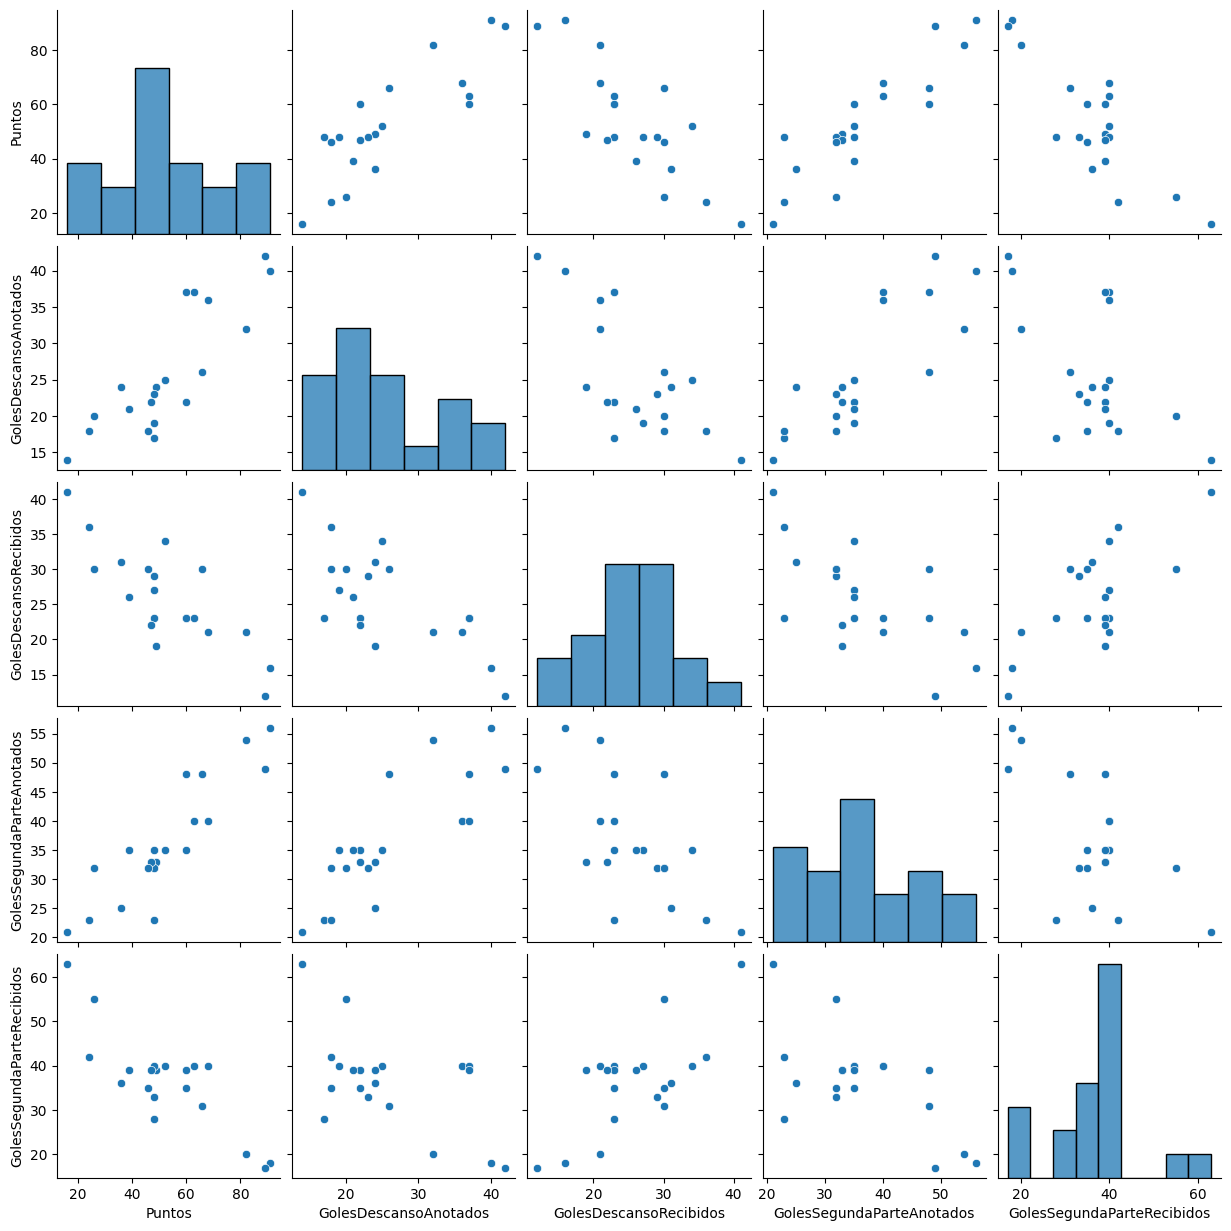

In [33]:
sns.pairplot(analisis_goles[["Puntos","GolesDescansoAnotados","GolesDescansoRecibidos","GolesSegundaParteAnotados","GolesSegundaParteRecibidos"]])
plt.show()

### Resultados  
Aunque claramente el marcador se mueve con más frecuencia en la segunda mitad que en la primera (*hasta un 17% más de goles*) esto parece no ser muy significativo para los puntos obtenidos, ya que los gráficos de dispersión no reflejan una tendencia tan marcada como en el *goal average*, por ejemplo.  

Por tanto, podemos concluir que es más importante para el resultado final marcar goles que el momento en que se marcan estos goles.

### Relación entre disparos y resultados
1. **¿Qué impacto tienen los tiros a puerta en el resultado final?¿Los equipos con más tiros a puerta suelen ganar más partidos?**
2. **¿Qué equipos son más efectivos (relación goles/tiros a puerta)? ¿Influye la efectividad en el resultado?**

In [72]:
resultados_totales[["GolesAnotados", "TirosRealizados", "TirosAPuerta", "Punteria", "Efectividad"]]

FullTimeResult,GolesAnotados,TirosRealizados,TirosAPuerta,Punteria,Efectividad
0,96,690.0,278.0,40.289855,34.532374
1,91,657.0,227.0,34.550989,40.088106
2,86,790.0,277.0,35.063291,31.046931
3,76,514.0,190.0,36.964981,40.000000
4,74,582.0,214.0,36.769759,34.579439
5,77,548.0,215.0,39.233577,35.813953
6,57,550.0,193.0,35.090909,29.533679
7,85,551.0,213.0,38.656987,39.906103
8,60,450.0,150.0,33.333333,40.000000
9,57,456.0,169.0,37.061404,33.727811


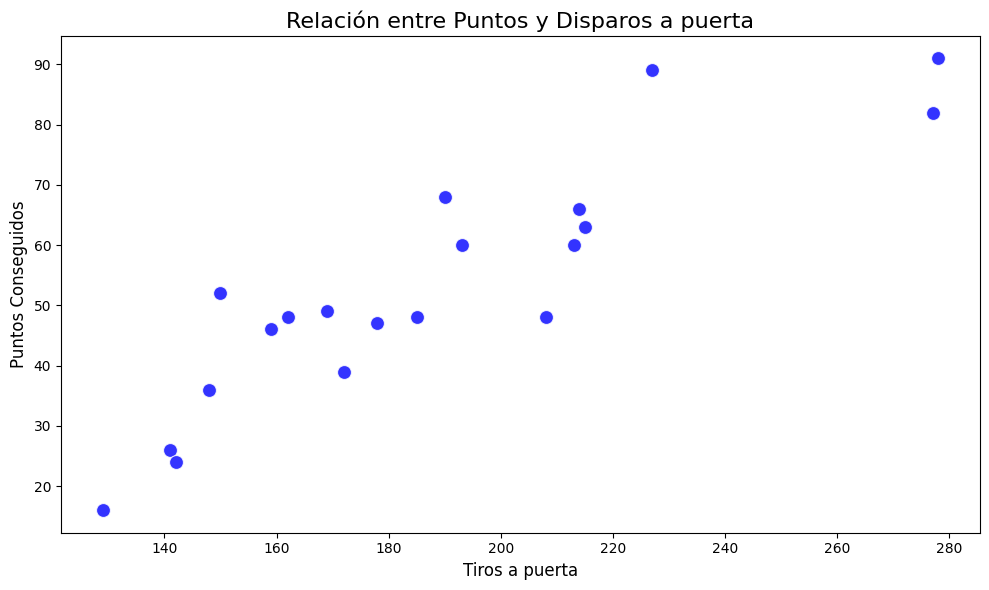

In [73]:
# Primero, veremos la relación entre los disparos a puerta y los puntos conseguidos.

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=resultados_totales["TirosAPuerta"],
    y=resultados_totales["Puntos"],
    color="blue",
    alpha=0.8,
    s=100
)
plt.title("Relación entre Puntos y Disparos a puerta", fontsize=16)
plt.xlabel("Tiros a puerta", fontsize=12)
plt.ylabel("Puntos Conseguidos", fontsize=12)
plt.tight_layout()
plt.show()

In [118]:
resultados_totales[["Equipo","Puntos","TirosAPuerta","TirosRealizados","Punteria", "Efectividad"]].sort_values("Puntos", ascending=False)

,Equipo,Puntos,TirosAPuerta,TirosRealizados,Punteria,Efectividad
0,Man City,91,278.0,690.0,40.289855,34.532374
1,Arsenal,89,227.0,657.0,34.550989,40.088106
2,Liverpool,82,277.0,790.0,35.063291,31.046931
3,Aston Villa,68,190.0,514.0,36.964981,40.000000
4,Tottenham,66,214.0,582.0,36.769759,34.579439
5,Chelsea,63,215.0,548.0,39.233577,35.813953
6,Man United,60,193.0,550.0,35.090909,29.533679
7,Newcastle,60,213.0,551.0,38.656987,39.906103
8,West Ham,52,150.0,450.0,33.333333,40.000000
9,Crystal Palace,49,169.0,456.0,37.061404,33.727811


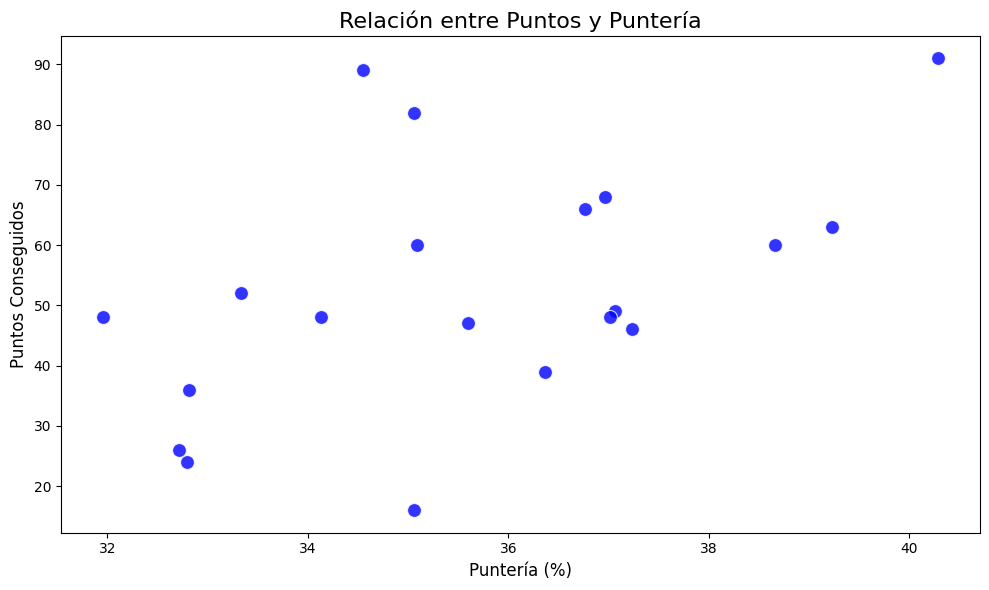

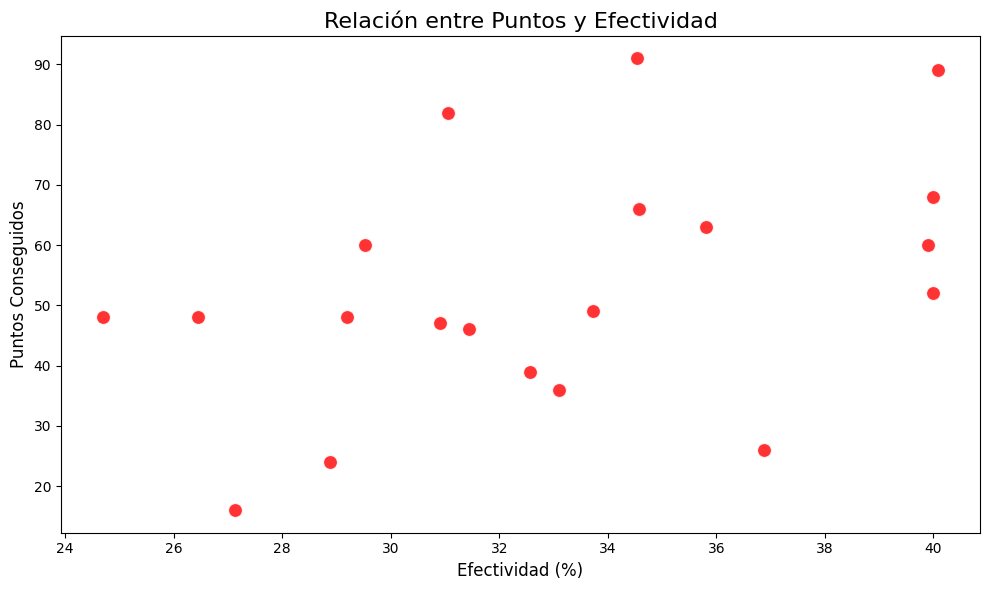

In [74]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=resultados_totales["Punteria"],
    y=resultados_totales["Puntos"],
    color="blue",
    alpha=0.8,
    s=100
)
plt.title("Relación entre Puntos y Puntería", fontsize=16)
plt.xlabel("Puntería (%)", fontsize=12)
plt.ylabel("Puntos Conseguidos", fontsize=12)
plt.tight_layout()
plt.show()

# Gráfico de Puntos vs Efectividad
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=resultados_totales["Efectividad"],
    y=resultados_totales["Puntos"],
    color="red",
    alpha=0.8,
    s=100
)
plt.title("Relación entre Puntos y Efectividad", fontsize=16)
plt.xlabel("Efectividad (%)", fontsize=12)
plt.ylabel("Puntos Conseguidos", fontsize=12)
plt.tight_layout()
plt.show()


### Resultado  
Como se observa en la primera gráfica, sí que se aprecia una correlación entre los disparos a puerta y los puntos: en general, los equipos que más puntos han obtenido son los que más disparos a portería han realizado, y al revés.  

Sin embargo, se observa algo curioso: aunque los tiros a puerta están directamente relacionados con el puntaje, la efectividad y la puntería de cara a puerta parece no influir en los puntos conseguidos. Por ejemplo, hay 7 equipos más efectivos que el equipo que más puntos consiguió (*Man City*), incluso el último clasificado tiene más puntería que el Arsenal, que acabó en segunda posición.  

No obstante, esto puede deberse a que los equipos que más disparos realizan también tienen más probabilidad de que una mayoría de los tiros vayan fuera o que, los que vayan a puerta, no acaben en gol.

Por tanto:  
1. **Los tiros a puerta sí están relacionados con los puntos conseguidos**  
2. **La efectividad parece no tener mucha relevancia en este aspecto**

### Relación entre corners y puntos conseguidos  
**¿Tienen relación directa los corners con los puntos obtenidos?**

In [11]:
corners = resultados_totales[["Puntos", "CornersAFavor", "CornersEnContra", "GolesAnotados", "TirosAPuerta"]]

<function matplotlib.pyplot.show(close=None, block=None)>

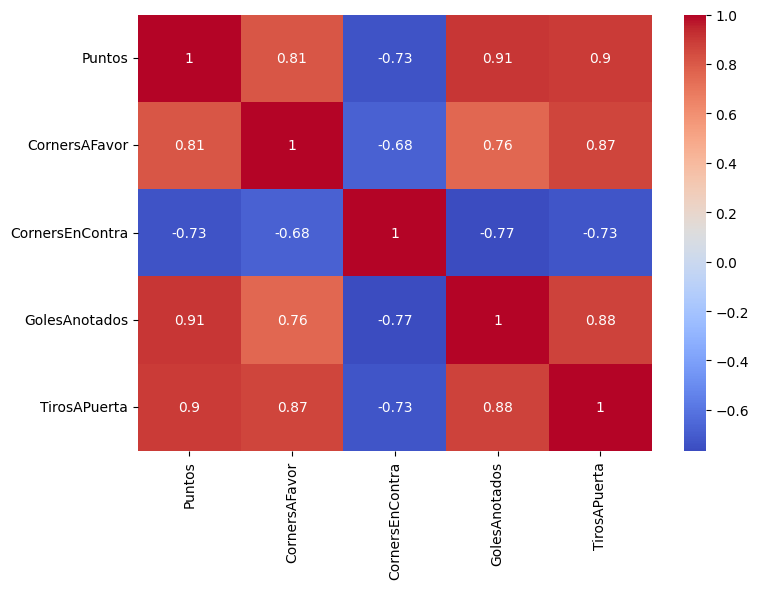

In [13]:
correlacion = corners.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlacion, annot=True, cbar=True, cmap="coolwarm")
plt.tight_layout()
plt.show

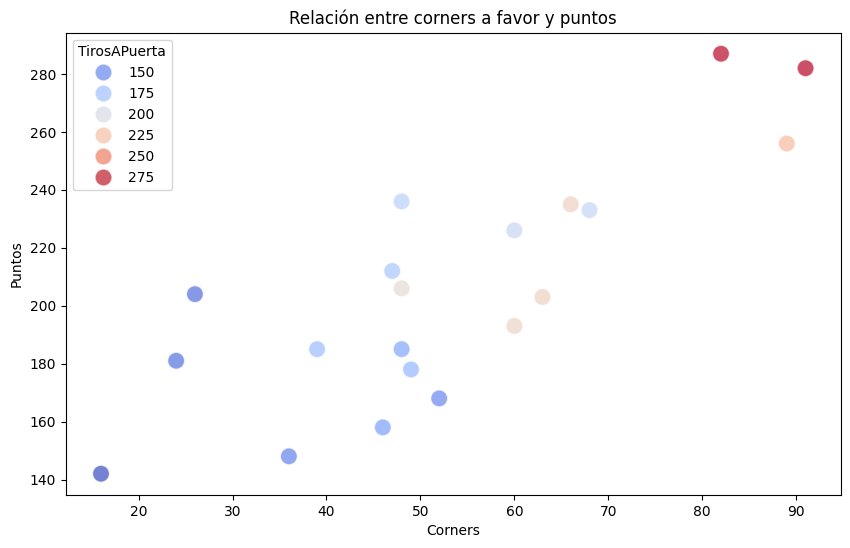

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=corners.Puntos, y=corners.CornersAFavor, color="blue", alpha=0.7, hue=corners.TirosAPuerta, s=150, palette="coolwarm")
plt.title("Relación entre corners a favor y puntos")
plt.xlabel("Corners")
plt.ylabel("Puntos")

plt.show()

### Resultados  
Los corners parecen no tener una correlación muy marcada con los puntos obtenidos, aunque sí que se aprecia cierta relación positiva. No obstante, como en las demás estadísticas, los equipos con mayor potencial ofensivo es normal que también tengan muchos saques de esquina. Por tanto, no se ve una relación directa, pero sí nos invita a pensar que los equipos que más tiran son también los que más corners sacan, los que más goles marcan y, por tanto, los que más puntos acaban sumando.

### Fairplay, faltas y tarjetas  
**¿Influyen las faltas y las tarjetas, tanto amarillas como rojas, en el resultado de la liga?**  
**¿Son los equipos con menos puntos los que más faltas realizan y más tarjetas ven?**

In [28]:
fairplay = resultados_totales[["Puntos","FaltasCometidas","FaltasRecibidas","AmarillasPropias","AmarillasRival","RojasPropias","RojasRival"]]

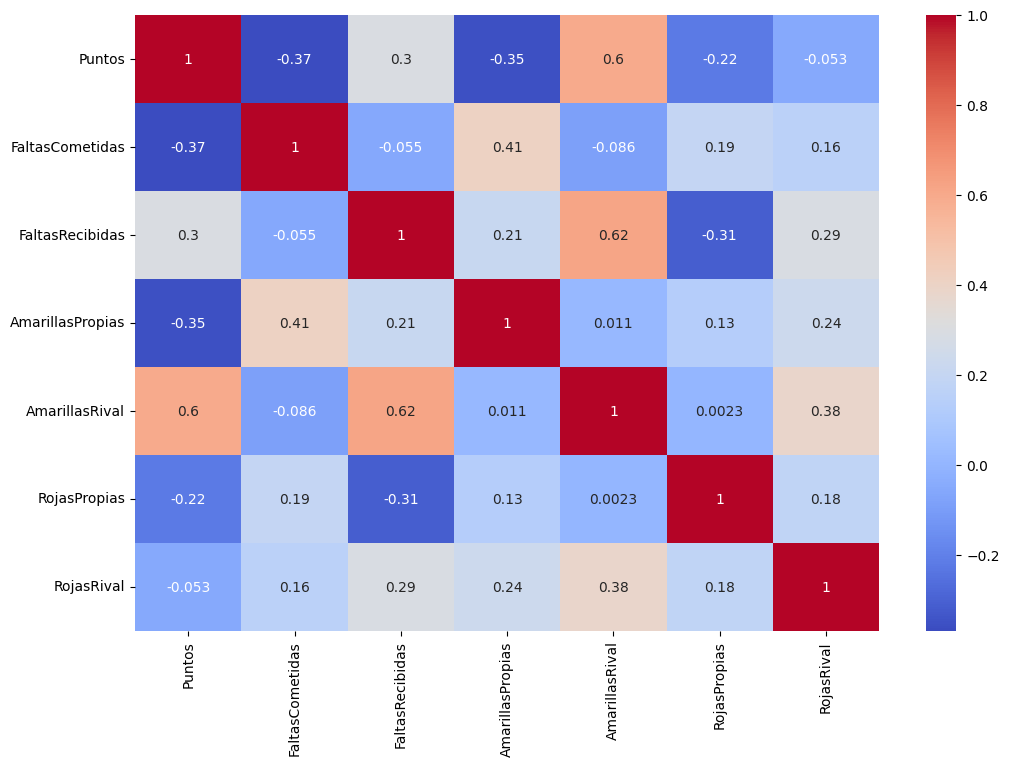

In [30]:
correlacion = fairplay.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlacion, cmap="coolwarm", cbar=True, annot=True)
plt.show()

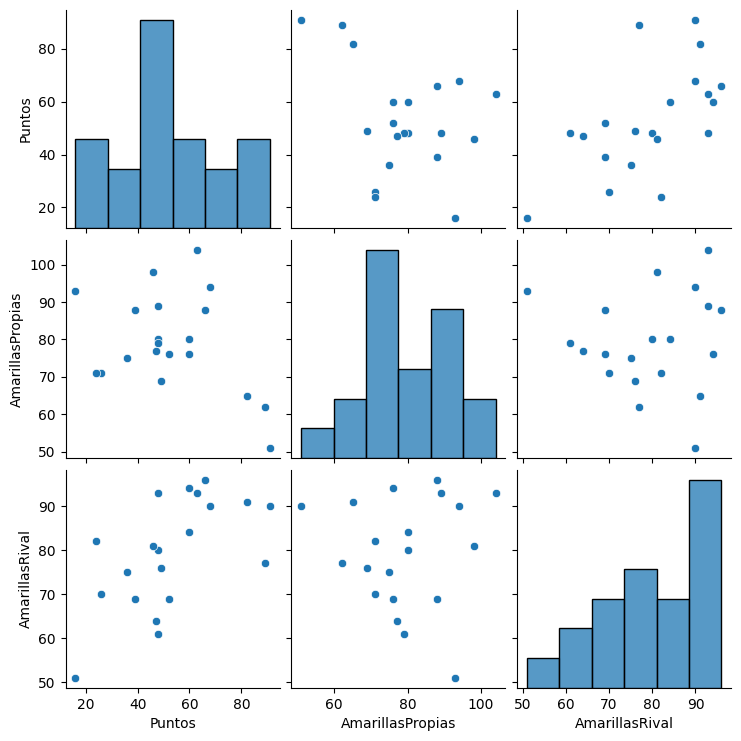

In [32]:
sns.pairplot(fairplay[["Puntos","AmarillasPropias","AmarillasRival"]])
plt.show()

### Resultados  
En un primer vistazo, no se aprecia ningún tipo de correlación, según la matriz, entre las faltas o las tarjetas con la puntuación obtenida. Si lo analizamos mejor con los scatterplots, tampoco parece que haya alguna relación, más allá de los valores extremos (*los equipos que lideran la tabla son los que menos tarjetas reciben*) son gráficos sin ninguna tendencia clara. 

Por tanto, podríamos decir que el *fairplay* no tiene correlación con los puntos obtenidos.

## Conclusiones

Después de analizar cada uno de los factores de forma individual en relación a los puntos obtenidos en la liga, podemos concluir que:  
- El rendimiento de un equipo es superior jugando en casa que como visitante.  
- Uno de los elementos más importantes para determinar la clasificación es el ***goal average***: un equipo con un goal average alto tenderá a clasificar mejor que un equipo con peor goal average.  
- El potencial ofensivo de un equipo (*tiros a puerta y goles*) también es determinante para la clasificación.
- Aunque puedan entrar dentro del *potencial ofensivo*, los tiros totales y corners no son tan determinantes, pero los equipos que cumplan con los dos puntos anteriores también tendrán una cantidad considerable de tiros totales y corners.  

  
- Sin embargo, aunque la ofensiva de un equipo hemos visto que es determinante para su clasificación en la liga, la puntería (*disparos que van a puerta sobre el total de disparos*) y la efectividad (*goles/tiros a puerta*) no es un factor relevante ni tiene mucha relación con los puntos obtenidos. Que un equipo sea más efectivo o el que más balones pone entre los tres palos no garantiza que vaya a ser el que más puntos consiga.  
- Siguiendo con los goles, el momento en que se marcan (*primera o segunda parte*) tampoco parece ser muy relevante para el puesto final en la clasificación. Es más importante el *cuánto* que el *cuándo*. Nota: en la segunda parte se marcan un número considerablemente mayor de goles que en la primera.  
- El *fairplay*, las faltas o las tarjetas, tampoco influyen directamente en el número de puntos obtenidos.


## Segunda parte  
Como ya hemos visto los principales factores, vamos a realizar cálculos de la rentabilidad que habríamos tenido apostando en distintos casos. Para ello, vamos a basarnos en los análisis previos. Podemos empezar por el rendimiento como local y plantear lo siguiente:  

**¿Habríamos tenido rentabilidad positiva si hubiéramos apostado que el equipo local gana en todos los partidos de la temporada? Independientemente de cuál sea el equipo**

In [4]:
# Volvemos a utilizar el dataset donde se encuentran las cuotas y filtramos a la temporada elegida
df = pd.read_csv("./src/data/PremierLeague.csv")
pl_23_24 = df[df.Season == "2023-2024"]

In [65]:
pl_23_24.FullTimeResult.value_counts() / len(pl_23_24) * 100

FullTimeResult
H    46.052632
A    32.368421
D    21.578947
Name: count, dtype: float64

In [5]:
# El bankroll es la cantidad total a apostar, que se calcula al multiplicar la cantidad apostada en cada partido con los partidos totales
# También lo usaremos para calcular la rentabilidad total
bankroll = len(pl_23_24) * 10

In [68]:
# Ahora sí, calculamos la rentabilidad de nuestras apuestas tanto para 'Todo a Home' como también al empate y a la victoria visitante.

total = pl_23_24.apply(lambda row: fb.calcular_rentabilidad_HDA(row, result="H"), axis=1).sum()
rentabilidad = total * 100 / bankroll
rent_home = [total,rentabilidad]

total = pl_23_24.apply(lambda row: fb.calcular_rentabilidad_HDA(row, result="D"), axis=1).sum()
rentabilidad = total * 100 / bankroll
rent_draw = [total,rentabilidad]

total = pl_23_24.apply(lambda row: fb.calcular_rentabilidad_HDA(row, result="A"), axis=1).sum()
rentabilidad = total * 100 / bankroll
rent_away = [total,rentabilidad]

resultados_odds_HDA = pd.DataFrame({
    "Estrategia": ["Todo a Home", "Todo a Draw", "Todo a Away"],
    "Total(€)": [rent_home[0], rent_draw[0], rent_away[0]],
    "Rentabilidad(%)": [rent_home[1], rent_draw[1], rent_away[1]]
})

resultados_odds_HDA

,Estrategia,Total(€),Rentabilidad(%)
0,Todo a Home,-54.4,-1.431579
1,Todo a Draw,-188.1,-4.950000
2,Todo a Away,-310.1,-8.160526


#### No se consiguió la rentabilidad  
A pesar de que las victorias locales son un 46% de los resultados de toda la temporada, apostar sólo por equipos que juegan en casa habría significado una rentabilidad de -1.43%. Sin embargo, sigue siendo mejor resultado que haber apostado al empate en todos los partidos, o a la victoria visitante, con una rentabilidad de -4.95% y -8.16% respectivamente.  

Pero... ¿Esto se repite en cada temporada? Vamos a hacer la prueba con las dos temporadas anteriores a la analizada: la 21/22 y la 22/23.

In [6]:
pl_21_22 = df[df.Season == "2021-2022"]
pl_22_23 = df[df.Season == "2022-2023"]

In [70]:
# Cálculo de la rentabilidad en la temporada 2021/2022

total = pl_21_22.apply(lambda row: fb.calcular_rentabilidad_HDA(row, result="H"), axis=1).sum()
rentabilidad = total * 100 / bankroll
rent_home = [total,rentabilidad]

total = pl_21_22.apply(lambda row: fb.calcular_rentabilidad_HDA(row, result="D"), axis=1).sum()
rentabilidad = total * 100 / bankroll
rent_draw = [total,rentabilidad]

total = pl_21_22.apply(lambda row: fb.calcular_rentabilidad_HDA(row, result="A"), axis=1).sum()
rentabilidad = total * 100 / bankroll
rent_away = [total,rentabilidad]

resultados_odds_21_22 = pd.DataFrame({
    "Estrategia": ["Todo a Home", "Todo a Draw", "Todo a Away"],
    "Total(€)": [rent_home[0], rent_draw[0], rent_away[0]],
    "Rentabilidad(%)": [rent_home[1], rent_draw[1], rent_away[1]]
})

resultados_odds_21_22

,Estrategia,Total(€),Rentabilidad(%)
0,Todo a Home,-200.2,-5.268421
1,Todo a Draw,-150.3,-3.955263
2,Todo a Away,75.6,1.989474


In [72]:
# Cálculo de la rentabilidad en la temporada 2022/2023

total = pl_22_23.apply(lambda row: fb.calcular_rentabilidad_HDA(row, result="H"), axis=1).sum()
rentabilidad = total * 100 / bankroll
rent_home = [total,rentabilidad]

total = pl_22_23.apply(lambda row: fb.calcular_rentabilidad_HDA(row, result="D"), axis=1).sum()
rentabilidad = total * 100 / bankroll
rent_draw = [total,rentabilidad]

total = pl_22_23.apply(lambda row: fb.calcular_rentabilidad_HDA(row, result="A"), axis=1).sum()
rentabilidad = total * 100 / bankroll
rent_away = [total,rentabilidad]

resultados_odds_22_23 = pd.DataFrame({
    "Estrategia": ["Todo a Home", "Todo a Draw", "Todo a Away"],
    "Total(€)": [rent_home[0], rent_draw[0], rent_away[0]],
    "Rentabilidad(%)": [rent_home[1], rent_draw[1], rent_away[1]]
})

resultados_odds_22_23

,Estrategia,Total(€),Rentabilidad(%)
0,Todo a Home,513.4,13.510526
1,Todo a Draw,-115.4,-3.036842
2,Todo a Away,-389.2,-10.242105


In [73]:
# Se unifican los resultados en un mismo dataframe, sumando el total y haciendo una media de la rentabilidad
resultados_odds_totales = resultados_odds_HDA.copy()
resultados_odds_totales['Total(€)'] = resultados_odds_HDA['Total(€)'] + resultados_odds_21_22['Total(€)'] + resultados_odds_22_23['Total(€)']
resultados_odds_totales['Rentabilidad(%)'] = (resultados_odds_HDA['Rentabilidad(%)'] + resultados_odds_21_22['Rentabilidad(%)'] + resultados_odds_22_23['Rentabilidad(%)']) / 3

In [18]:
resultados_odds_totales

,Estrategia,Total(€),Rentabilidad(%)
0,Todo a Home,258.8,2.270175
1,Todo a Draw,-453.8,-3.980702
2,Todo a Away,-623.7,-5.471053


### Resultados  
En esta ocasión, con una perspectiva más amplia y sumando las 3 últimas temporadas, si hubiéramos apostado en todos los partidos de la liga por la victoria local (*con la misma cantidad en cada uno, importante*) habríamos conseguido una **rentabilidad positiva del 2.27%**. Si lo hubiéramos hecho con el empate o con la victoria visitante, los resultados son negativos: **-3.98% y -5.47% de rentabilidad** respectivamente.  

No obstante, y con tan solo 3 temporadas de muestra, no significa que si se mantiene esta estrategia en el tiempo, confiando en el potencial de los equipos cuando juegan en su estadio, se vaya a conseguir una rentabilidad positiva. Lo que sí se podría llegar a pensar es que, esta estrategia, es **más rentable** que apostar por el empate o por los equipos visitantes.

### Apostando por los mejores  
Ya hemos visto que apostar a los equipos locales, a pesar de tener mejor rendimiento, no garantiza una rentabilidad (*o al menos una considerable*), pero... 

**¿Y si apostamos por los mejores equipos cuando juegan de local?**  

Para ello, vamos a utilizar el dataframe de la clasificación de los equipos como local: *resultados_en_casa*. 

In [5]:
top_5_locales = resultados_en_casa.iloc[0:5]
top_5_locales

,Equipo,Victorias,Empates,Derrotas,Puntos,GolesAnotados,GolesRecibidos,GolesDescansoAnotados,GolesDescansoRecibidos,TirosRealizados,...,TirosAPuerta,TirosRecibidosAPuerta,CornersAFavor,CornersEnContra,FaltasCometidas,FaltasRecibidas,AmarillasPropias,AmarillasRival,RojasPropias,RojasRival
0,Liverpool,15,3,1,48,49,17,20.0,10.0,478.0,...,175.0,64.0,163.0,59.0,228.0,212.0,26.0,49.0,1.0,3.0
1,Arsenal,15,2,2,47,48,16,19.0,7.0,360.0,...,127.0,45.0,129.0,51.0,195.0,187.0,34.0,40.0,1.0,2.0
2,Man City,14,5,0,47,51,16,25.0,6.0,364.0,...,129.0,46.0,155.0,48.0,148.0,220.0,22.0,49.0,2.0,0.0
3,Aston Villa,12,4,3,40,48,28,21.0,8.0,280.0,...,105.0,74.0,114.0,70.0,212.0,261.0,48.0,49.0,1.0,1.0
4,Newcastle,12,4,3,40,49,22,21.0,10.0,330.0,...,123.0,80.0,112.0,88.0,187.0,246.0,32.0,49.0,1.0,3.0


In [28]:
print(f"Estadísticas entre los 5: {top_5_locales["Victorias"].sum()} victorias, {top_5_locales["Empates"].sum()} empates y {top_5_locales["Derrotas"].sum()} derrotas")
total = top_5_locales["Victorias"].sum() + top_5_locales["Empates"].sum() + top_5_locales["Derrotas"].sum()
print(f"% victorias: {round(top_5_locales["Victorias"].sum() / total * 100,2)} - % no victorias: {round(total - (top_5_locales["Victorias"].sum()) / total * 100,2)}")

Estadísticas entre los 5: 68 victorias, 18 empates y 9 derrotas
% victorias: 71.58 - % no victorias: 23.42


En principio, con un **71.58%** de victorias, se podría pensar que estas apuestas podrían ser rentables. Sin embargo, hay que tener en cuenta que son los mejores equipos jugando en casa, lo que asegura **cuotas muy bajas** y, por tanto, los beneficios de acertar estas apuestas serán muy pequeños.

In [129]:
filtro = (pl_23_24.HomeTeam == "Liverpool") | (pl_23_24.HomeTeam == "Arsenal") | (pl_23_24.HomeTeam == "Man City") | (pl_23_24.HomeTeam == "Aston Villa") | (pl_23_24.HomeTeam == "Newcastle")
pl_23_24_top = pl_23_24[filtro]

In [130]:
equipos_top = pl_23_24_top["HomeTeam"].unique()
dict_rent_top = {equipo: 0 for equipo in equipos_top}

def rentabilidad_equipo(row, amm=10):
    if row["FullTimeResult"] == "H":
        dict_rent_top[row["HomeTeam"]] += amm * row["MarketMaxHomeTeam"] - amm
    else:
        dict_rent_top[row["HomeTeam"]] -= amm

pl_23_24_top.apply(rentabilidad_equipo, axis=1)

dict_rent_top


{'Arsenal': 36.6,
 'Newcastle': 47.6,
 'Liverpool': 16.400000000000002,
 'Man City': -16.999999999999993,
 'Aston Villa': 73.1}

In [131]:
resultados_top_local = pd.DataFrame(list(dict_rent_top.items()), columns=["Equipo", "Total(€)"])

# Para calcular la rentabilidad, tenemos que hacerlo sobre el total apostado. Este se calcula, para cada equipo, multiplicando el número de partidos por la cantidad apostada.
# En este caso, como son 5 los equipos analizados, se divide la longitud del dataframe entre 5, para obtener la cantidad de partidos de cada uno.
resultados_top_local["Rentabilidad(%)"] = round(resultados_top_local["Total(€)"] * 100 / (len(pl_23_24_top)/5 * 10), 2)
resultados_top_local

,Equipo,Total(€),Rentabilidad(%)
0,Arsenal,36.6,19.26
1,Newcastle,47.6,25.05
2,Liverpool,16.4,8.63
3,Man City,-17.0,-8.95
4,Aston Villa,73.1,38.47


### Sorpresa: una mejor rentabilidad de lo esperado  
Aunque se podía pensar que apostando por los equipos más fuertes como local de esta temporada no se podría conseguir una rentabilidad positiva, debido a las cuotas bajas, **4 de los 5 equipos han sido muy rentables**, exceptuando el Man City.  

Cabe destacar la sorprendente rentabilidad del Newcastle(*25.05%*) y del Aston Villa (*38.47%*). Se puede apreciar que, cuanto "más favorito" o "más grande" sea el equipo, menor es la rentabilidad. Por eso, equipos a priori no tan favoritos como los dos mencionados, consiguen rentabilidades más altas gracias a algunas cuotas que fueron favorables para Newcastle y Aston Villa, como por ejemplo:  

- Newcastle	Arsenal	a cuota 2.89
- Newcastle	Man United a cuota 2.00
- Newcastle	Tottenham a cuota 2.90  

- Aston Villa Brighton a cuota 2.65
- Aston Villa Man City a cuota 4.90
- Aston Villa Arsenal a cuota 3.55

Estas cuotas tan altas contra equipos que, en principio, son favoritos, hacen que la rentabilidad aumente en estos equipos en comparación con equipos más grandes como el Liverpool o el Arsenal.  

Pero comprobemos si estos equipos también fueron rentables en las dos temporadas anteriores.

In [120]:
# Creamos los nuevos dataframes filtrados con los datos que nos interesan
filtro_22_23 = (pl_22_23.HomeTeam == "Liverpool") | (pl_22_23.HomeTeam == "Man City") | (pl_22_23.HomeTeam == "Arsenal") | (pl_22_23.HomeTeam == "Aston Villa") | (pl_22_23.HomeTeam == "Newcastle")
filtro_21_22 = (pl_21_22.HomeTeam == "Liverpool") | (pl_21_22.HomeTeam == "Man City") | (pl_21_22.HomeTeam == "Arsenal") | (pl_21_22.HomeTeam == "Aston Villa") | (pl_21_22.HomeTeam == "Newcastle")

pl_22_23_top = pl_22_23[filtro_22_23]
pl_21_22_top = pl_21_22[filtro_21_22]

In [121]:
# Se calculan las rentabilidades de las dos temporadas y se guarda cada una en un diccionario
rent_22_23 = {equipo: 0 for equipo in pl_22_23_top["HomeTeam"].unique()}
rent_21_22 = {equipo: 0 for equipo in pl_21_22_top["HomeTeam"].unique()}

def rentabilidad_equipo(row, amm=10):
    if row["FullTimeResult"] == "H":
        rent_21_22[row["HomeTeam"]] += amm * row["MarketMaxHomeTeam"] - amm
    else:
        rent_21_22[row["HomeTeam"]] -= amm

pl_21_22_top.apply(rentabilidad_equipo, axis=1)

def rentabilidad_equipo(row, amm=10):
    if row["FullTimeResult"] == "H":
        rent_22_23[row["HomeTeam"]] += amm * row["MarketMaxHomeTeam"] - amm
    else:
        rent_22_23[row["HomeTeam"]] -= amm

pl_22_23_top.apply(rentabilidad_equipo, axis=1)

11024    None
11030    None
11031    None
11033    None
11039    None
         ... 
11381    None
11386    None
11387    None
11390    None
11391    None
Length: 95, dtype: object

In [122]:
# Se convierten los diccionarios en dataframes, después se combinan y se organizan para que quede el dataframe final
data = []
for team, balance in rent_21_22.items():
    data.append({'Equipo': team, 'Temporada': '21/22', 'Total': balance})
for team, balance in rent_22_23.items():
    data.append({'Equipo': team, 'Temporada': '22/23', 'Total': balance})
df = pd.DataFrame(data)

In [123]:
df["Rentabilidad(%)"] = round(df["Total"] * 100 / (19 * 10), 2)

In [133]:
df_combined = pd.concat([df, resultados_top_local], ignore_index=True)

In [134]:
df_combined["Temporada"] = df_combined["Temporada"].fillna("23/24")
df_combined["Total"] = df_combined["Total"].fillna(df_combined["Total(€)"])
df_combined.drop(columns="Total(€)", inplace=True)

In [64]:
df_combined

,Equipo,Temporada,Total,Rentabilidad(%)
0,Newcastle,21/22,33.1,17.42
1,Liverpool,21/22,1.2,0.63
2,Aston Villa,21/22,-57.2,-30.11
3,Man City,21/22,-1.5,-0.79
4,Arsenal,21/22,38.2,20.11
5,Newcastle,22/23,17.0,8.95
6,Aston Villa,22/23,85.2,44.84
7,Arsenal,22/23,33.1,17.42
8,Man City,22/23,29.4,15.47
9,Liverpool,22/23,29.0,15.26


In [135]:
df_combined.groupby("Equipo")["Total"].sum()

Equipo
Arsenal        107.9
Aston Villa    101.1
Liverpool       46.6
Man City        10.9
Newcastle       97.7
Name: Total, dtype: float64

In [63]:
df_combined.groupby("Equipo")["Rentabilidad(%)"].mean()

Equipo
Arsenal        18.930000
Aston Villa    17.733333
Liverpool       8.173333
Man City        1.910000
Newcastle      17.140000
Name: Rentabilidad(%), dtype: float64

### Resultados  
En el análisis de las 3 temporadas anteriores, hemos obtenido una increíble rentabilidad total, en especial del Arsenal, Aston Villa y Newcastle. Nos indica que esta rentabilidad ha sido considerablemente superior en los equipos "menos favoritos". Es lógico, puesto que estos pueden tener cuotas más altas y, por tanto, darnos mayores beneficios cuando consiguen la victoria.  

Después de lo analizado, podemos concluir que **apostar por los equipos más fuertes de la Premier League cuando juegan en su estadio tiene rentabilidad**, en especial con **equipos que no son tan favoritos**. Esto teniendo en cuenta que hemos utilizado la **cuota máxima** para calcularlo, pero esto es muy difícil de conseguir. Por tanto, podemos esperar que la rentabilidad sea menor.

Sin embargo, sólo podemos concluir esto de las temporadas pasadas, pues no hay que olvidar que los equipos pueden cambiar de un año a otro y su rendimiento puede variar, hasta incluso girar esta rentabilidad en nuestra contra. 

### Rentabilidad como local y visitante de todos los equipos en la 23/24  
Ya hemos visto la rentabilidad del top 5 equipos locales, con resultados positivos. Ahora vamos a calcular la rentabilidad total de todos los equipos para esta temporada, para buscar algún tipo de correlación entre todas las variables.

In [46]:
# Primero, calculamos la rentabilidad de todos los equipos, para ello contaremos sólo con sus victorias como local o como visitante, no empates.
equipos = pl_23_24["HomeTeam"].unique()
rent_home_away = {equipo: [0, 0] for equipo in equipos}

def rentabilidad_home_away(row, amm=10):
    if row["FullTimeResult"] == "H":
        rent_home_away[row["HomeTeam"]][0] += amm * row["MarketMaxHomeTeam"] - amm
        rent_home_away[row["AwayTeam"]][1] -= amm
    elif row["FullTimeResult"] == "A":
        rent_home_away[row["HomeTeam"]][0] -= amm
        rent_home_away[row["AwayTeam"]][1] += amm * row["MarketMaxAwayTeam"] - amm
    else:
        rent_home_away[row["HomeTeam"]][0] -= amm
        rent_home_away[row["AwayTeam"]][1] -= amm

pl_23_24.apply(rentabilidad_home_away, axis=1)

rent_home_away

{'Burnley': [-137.0, -84.3],
 'Arsenal': [36.6, 8.499999999999998],
 'Bournemouth': [-13.800000000000008, 1.3000000000000007],
 'Brighton': [-26.699999999999996, -100.3],
 'Everton': [49.0, -26.5],
 'Sheffield United': [-102.0, -142.5],
 'Newcastle': [47.6, -38.500000000000014],
 'Brentford': [-100.8, -9.100000000000001],
 'Chelsea': [0.8999999999999968, -40.3],
 'Man United': [3.399999999999997, -0.40000000000000213],
 "Nott'm Forest": [-40.1, 11.100000000000001],
 'Fulham': [64.1, -46.9],
 'Liverpool': [16.400000000000002, -33.40000000000001],
 'Wolves': [91.89999999999998, 28.5],
 'Tottenham': [51.30000000000002, -57.8],
 'Man City': [-16.999999999999993, 10.699999999999992],
 'Aston Villa': [73.1, 92.7],
 'West Ham': [-22.599999999999998, 111.89999999999998],
 'Crystal Palace': [-15.200000000000003, 98.30000000000001],
 'Luton': [-13.499999999999993, -93.1]}

In [47]:
# Lo convertimos a un dataframe y lo unimos al dataframe de resultados_totales, creando uno nuevo con todas las estadísticas
df = pd.DataFrame.from_dict(rent_home_away, orient='index', columns=['TotalHome', 'TotalAway']).reset_index()
df.columns = ['Equipo', 'TotalHome', 'TotalAway']

df = df.round(2)

resultados_totales_final = resultados_totales.merge(df[['Equipo', 'TotalHome', 'TotalAway']], on='Equipo', how='left')

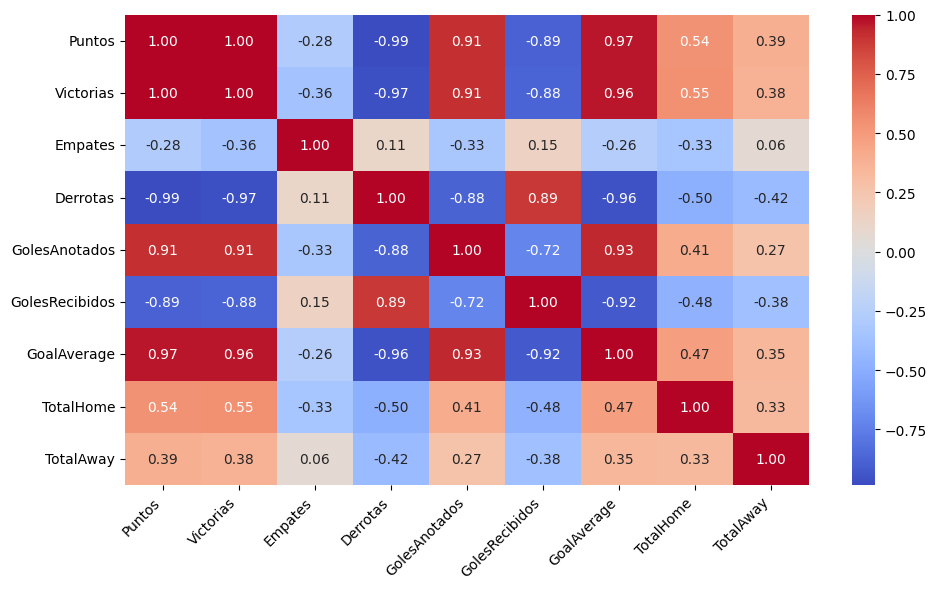

In [48]:
# Y mostramos la matriz de correlación y las columnas que nos interesan para buscar alguna correlación destacada
correlacion_rentabilidad = resultados_totales_final[["Puntos","Victorias","Empates","Derrotas","GolesAnotados","GolesRecibidos","GoalAverage","TotalHome","TotalAway"]]
correlacion = correlacion_rentabilidad.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlacion, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [65]:
# Resultados ordenados por rentabilidad en casa (descendente)
resultados_totales_final[["Equipo","Puntos","Victorias","Empates","Derrotas","GolesAnotados","GolesRecibidos","GoalAverage","TotalHome","TotalAway"]].sort_values("TotalHome")

,Equipo,Puntos,Victorias,Empates,Derrotas,GolesAnotados,GolesRecibidos,GoalAverage,TotalHome,TotalAway
18,Burnley,24,5,9,24,41,78,-37,-137.0,-84.3
19,Sheffield United,16,3,7,28,35,104,-69,-102.0,-142.5
15,Brentford,39,10,9,19,56,65,-9,-100.8,-9.1
16,Nott'm Forest,36,9,9,20,49,67,-18,-40.1,11.1
10,Brighton,48,12,12,14,55,62,-7,-26.7,-100.3
8,West Ham,52,14,10,14,60,74,-14,-22.6,111.9
0,Man City,91,28,7,3,96,34,62,-17.0,10.7
9,Crystal Palace,49,13,10,15,57,58,-1,-15.2,98.3
11,Bournemouth,48,13,9,16,54,67,-13,-13.8,1.3
17,Luton,26,6,8,24,52,85,-33,-13.5,-93.1


In [67]:
# Resultados ordenados por rentabilidad como visitante (descendente)
resultados_totales_final[["Equipo","Puntos","Victorias","Empates","Derrotas","GolesAnotados","GolesRecibidos","GoalAverage","TotalHome","TotalAway"]].sort_values("TotalAway")

,Equipo,Puntos,Victorias,Empates,Derrotas,GolesAnotados,GolesRecibidos,GoalAverage,TotalHome,TotalAway
19,Sheffield United,16,3,7,28,35,104,-69,-102.0,-142.5
10,Brighton,48,12,12,14,55,62,-7,-26.7,-100.3
17,Luton,26,6,8,24,52,85,-33,-13.5,-93.1
18,Burnley,24,5,9,24,41,78,-37,-137.0,-84.3
4,Tottenham,66,20,6,12,74,61,13,51.3,-57.8
13,Fulham,47,13,8,17,55,61,-6,64.1,-46.9
5,Chelsea,63,18,9,11,77,63,14,0.9,-40.3
7,Newcastle,60,18,6,14,85,62,23,47.6,-38.5
2,Liverpool,82,24,10,4,86,41,45,16.4,-33.4
12,Everton,48,13,9,16,40,51,-11,49.0,-26.5


In [ ]:
# Equipos que han sido rentables tanto en casa como lejos de su estadio
resultados_totales_final[(resultados_totales_final["TotalHome"] > 0) & (resultados_totales_final["TotalAway"] > 0)][["Equipo","Puntos","Victorias","Empates","Derrotas","GolesAnotados","GolesRecibidos","GoalAverage","TotalHome","TotalAway"]]

,Equipo,Puntos,Victorias,Empates,Derrotas,GolesAnotados,GolesRecibidos,GoalAverage,TotalHome,TotalAway
1,Arsenal,89,28,5,5,91,29,62,36.6,8.5
3,Aston Villa,68,20,8,10,76,61,15,73.1,92.7
14,Wolves,46,13,7,18,50,65,-15,91.9,28.5


In [55]:
# Equipos que no han sido rentables ni en casa ni como visitante
resultados_totales_final[(resultados_totales_final["TotalHome"] < 0) & (resultados_totales_final["TotalAway"] < 0)][["Equipo","Puntos","Victorias","Empates","Derrotas","GolesAnotados","GolesRecibidos","GoalAverage","TotalHome","TotalAway"]]

,Equipo,Puntos,Victorias,Empates,Derrotas,GolesAnotados,GolesRecibidos,GoalAverage,TotalHome,TotalAway
10,Brighton,48,12,12,14,55,62,-7,-26.7,-100.3
15,Brentford,39,10,9,19,56,65,-9,-100.8,-9.1
17,Luton,26,6,8,24,52,85,-33,-13.5,-93.1
18,Burnley,24,5,9,24,41,78,-37,-137.0,-84.3
19,Sheffield United,16,3,7,28,35,104,-69,-102.0,-142.5


In [64]:
# Equipos que han obtenido una rentabilidad general (casa + visitante) positiva
resultados_totales_final[resultados_totales_final["TotalHome"] + resultados_totales_final["TotalAway"] > 0][["Equipo","Puntos","Victorias","Empates","Derrotas","GolesAnotados","GolesRecibidos","GoalAverage","TotalHome","TotalAway"]]

,Equipo,Puntos,Victorias,Empates,Derrotas,GolesAnotados,GolesRecibidos,GoalAverage,TotalHome,TotalAway
1,Arsenal,89,28,5,5,91,29,62,36.6,8.5
3,Aston Villa,68,20,8,10,76,61,15,73.1,92.7
6,Man United,60,18,6,14,57,58,-1,3.4,-0.4
7,Newcastle,60,18,6,14,85,62,23,47.6,-38.5
8,West Ham,52,14,10,14,60,74,-14,-22.6,111.9
9,Crystal Palace,49,13,10,15,57,58,-1,-15.2,98.3
12,Everton,48,13,9,16,40,51,-11,49.0,-26.5
13,Fulham,47,13,8,17,55,61,-6,64.1,-46.9
14,Wolves,46,13,7,18,50,65,-15,91.9,28.5


In [61]:
resultados_totales_final[resultados_totales_final["TotalHome"] > 0].value_counts().sum() / 20 * 100

np.float64(50.0)

In [62]:
resultados_totales_final[resultados_totales_final["TotalAway"] > 0].value_counts().sum() / 20 * 100

np.float64(40.0)

In [73]:
resultados_totales_final['TotalSum'] = resultados_totales_final['TotalHome'] + resultados_totales_final['TotalAway']

In [74]:
suma_10_primeros = resultados_totales_final.iloc[0:11]['TotalSum'].sum()
suma_10_primeros

np.float64(199.20000000000005)

In [76]:
suma_10_primeros_local = resultados_totales_final.iloc[0:11]['TotalHome'].sum()
suma_10_primeros_local

np.float64(147.8)

In [75]:
suma_10_ultimos = resultados_totales_final.iloc[11:20]['TotalSum'].sum()
suma_10_ultimos

np.float64(-563.6999999999999)

In [77]:
suma_10_ultimos_local = resultados_totales_final.iloc[11:20]['TotalHome'].sum()
suma_10_ultimos_local

np.float64(-202.2)

### Resultados  
Aunque no se aprecia una correlación clara entre la rentabilidad y otras variables, sí que podemos ver que 4 de los 5 equipos que han obtenido una rentabilidad negativa tanto en casa como de visitante ocupan últimos puestos en la clasificación (*15º, 17º, 18º y 19º*). 

Por otro lado, 7 equipos que forman parte de los 10 primeros puestos han tenido una rentabilidad positiva si hubiéramos apostado sólo a su victoria local, y 6 de los equipos de la mitad superior de la tabla también han obtenido rentabilidades positivas apostando tanto a su victoria local como visitante.  

Sin embargo, apostar como visitante no parece ser más arriesgado y sólo el 40% han sido rentables, pero sin un patrón claro encontrado.  

Las conclusiones que podríamos sacar de esta parte, y con los datos que nos aporta esta temporada, son:  

- Que apostar por la victoria de los peores equipos de la tabla no es rentable, ni como local ni como visitante. Aunque las cuotas por su victoria sean altas, son equipos que ganan muy pocos partidos.  
- Apostar por la victoria de equipos de la mitad superior de la tabla tiene más rentabilidad. Esto se ve en que la ganancia total de los 10 primeros equipos, si hubiéramos apostado a su victoria local y visitante durante toda la temporada, habría sido de **199.20€**, mientras que apostando igual por los últimos 10 equipos, habríamos obtenido un saldo negativo de **-536.70€**.  
- Si sólo hubiéramos confiado en el equipo local, apostando a los 10 mejores equipos, las ganancias habrían sido de **147.80€**, mientras que con los 10 últimos también habríamos quedado en negativo, con un total de **-202.20€**.

### Equipos con mayor potencial ofensivo: goles a favor
Ahora, vamos a analizar la rentabilidad de los goles, en este caso en mercado de *más de 2.5 goles*. Se analizará la rentabilidad individual de cada equipo para luego comparar con sus estadísticas de goles y *goal average* buscando alguna relación.  

Como se puede observar más abajo, en un **79% de los partidos hubo más de 2.5 goles**, por tanto, podemos esperar que apostando a favor de esta estadística podríamos sacar rentabilidad. Vamos a comprobarlo.

In [7]:
# Creamos la nueva columna en el dataframe de la temporada principal para ver la cantidad total de goles en cada partido.
pl_23_24["TotalGoals"] = pl_23_24.FullTimeHomeTeamGoals + pl_23_24.FullTimeAwayTeamGoals

C:\Users\juanj\AppData\Local\Temp\ipykernel_3596\1328392531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pl_23_24["TotalGoals"] = pl_23_24.FullTimeHomeTeamGoals + pl_23_24.FullTimeAwayTeamGoals


In [8]:
pl_22_23["TotalGoals"] = pl_22_23.FullTimeHomeTeamGoals + pl_22_23.FullTimeAwayTeamGoals
pl_21_22["TotalGoals"] = pl_21_22.FullTimeHomeTeamGoals + pl_21_22.FullTimeAwayTeamGoals

C:\Users\juanj\AppData\Local\Temp\ipykernel_3596\3769799674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pl_22_23["TotalGoals"] = pl_22_23.FullTimeHomeTeamGoals + pl_22_23.FullTimeAwayTeamGoals
C:\Users\juanj\AppData\Local\Temp\ipykernel_3596\3769799674.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pl_21_22["TotalGoals"] = pl_21_22.FullTimeHomeTeamGoals + pl_21_22.FullTimeAwayTeamGoals


In [9]:
pl_23_24.TotalGoals.value_counts() / len(pl_23_24) * 100

TotalGoals
2    21.315789
3    21.052632
4    21.052632
5    13.157895
1    11.052632
6     6.052632
0     2.894737
7     2.631579
8     0.789474
Name: count, dtype: float64

In [10]:
equipos = pl_23_24["HomeTeam"].unique()
rent_goles = {equipo: 0 for equipo in equipos}

def rentabilidad_goles(row, amm=10):
    if row["TotalGoals"] > 2.5:
        rent_goles[row["HomeTeam"]] += amm * row["MarketMaxOver2.5Goals"] - amm
        rent_goles[row["AwayTeam"]] += amm * row["MarketMaxOver2.5Goals"] - amm
    else:
        rent_goles[row["HomeTeam"]] -= amm
        rent_goles[row["AwayTeam"]] -= amm

pl_23_24.apply(rentabilidad_goles, axis=1)

11400    None
11401    None
11402    None
11403    None
11404    None
         ... 
11775    None
11776    None
11777    None
11778    None
11779    None
Length: 380, dtype: object

In [11]:
# Lo convertimos a dataframe y calculamos la rentabilidad (sobre 38 partidos cada equipo)
rent_goles_23_24 = pd.DataFrame(list(rent_goles.items()), columns=['Equipo', 'Total'])
rent_goles_23_24['Total'] = rent_goles_23_24['Total'].round(2)

In [12]:
rent_goles_23_24["Rentabilidad(%)"] = round(rent_goles_23_24["Total"] * 100 / (38 * 10), 2)

In [13]:
rent_goles_23_24 = rent_goles_23_24.sort_values(by='Rentabilidad(%)', ascending=False)

In [45]:
resultados_totales

,Equipo,Victorias,Empates,Derrotas,Puntos,GolesAnotados,GolesRecibidos,GolesDescansoAnotados,GolesDescansoRecibidos,TirosRealizados,...,CornersEnContra,FaltasCometidas,FaltasRecibidas,AmarillasPropias,AmarillasRival,RojasPropias,RojasRival,GoalAverage,Punteria,Efectividad
0,Man City,28,7,3,91,96,34,40.0,16.0,690.0,...,133.0,287.0,421.0,51.0,90.0,2.0,2.0,62,40.289855,34.532374
1,Arsenal,28,5,5,89,91,29,42.0,12.0,657.0,...,113.0,391.0,407.0,62.0,77.0,2.0,2.0,62,34.550989,40.088106
2,Liverpool,24,10,4,82,86,41,32.0,21.0,790.0,...,152.0,462.0,392.0,65.0,91.0,5.0,4.0,45,35.063291,31.046931
3,Aston Villa,20,8,10,68,76,61,36.0,21.0,514.0,...,161.0,413.0,483.0,94.0,90.0,2.0,3.0,15,36.964981,40.000000
4,Tottenham,20,6,12,66,74,61,26.0,30.0,582.0,...,236.0,425.0,530.0,88.0,96.0,4.0,4.0,13,36.769759,34.579439
5,Chelsea,18,9,11,63,77,63,37.0,23.0,548.0,...,191.0,445.0,464.0,104.0,93.0,3.0,4.0,14,39.233577,35.813953
6,Man United,18,6,14,60,57,58,22.0,23.0,550.0,...,279.0,398.0,352.0,80.0,84.0,1.0,1.0,-1,35.090909,29.533679
7,Newcastle,18,6,14,60,85,62,37.0,23.0,551.0,...,195.0,385.0,482.0,76.0,94.0,1.0,3.0,23,38.656987,39.906103
8,West Ham,14,10,14,52,60,74,25.0,34.0,450.0,...,229.0,390.0,407.0,76.0,69.0,3.0,2.0,-14,33.333333,40.000000
9,Crystal Palace,13,10,15,49,57,58,24.0,19.0,456.0,...,198.0,456.0,440.0,69.0,76.0,2.0,2.0,-1,37.061404,33.727811


In [40]:
rent_goles_23_24

,Equipo,Total,Rentabilidad(%)
5,Sheffield United,89.8,23.63
19,Luton,78.4,20.63
14,Tottenham,73.1,19.24
8,Chelsea,69.1,18.18
17,West Ham,66.8,17.58
6,Newcastle,60.0,15.79
13,Wolves,56.2,14.79
7,Brentford,53.3,14.03
16,Aston Villa,53.3,14.03
2,Bournemouth,51.5,13.55


### Primeros resultados  
Al margen de que 15 de los 20 equipos que forman la Premier League hubieran sido rentables en el mercado de *más de 2.5 goles*, es curioso ver que los 2 equipos que han superado el **20% de rentabilidad** son dos de los equipos que ocupaban el descenso (*Sheffield United y Luton*), con un *goal average* negativo, mientras que apostando a goles a dos de los equipos que estaban en el podio (*Man City y Liverpool*) hubiéramos tenido una rentabilidad negativa.  

Para encontrar algún tipo de relación, ya sea con goles, *goal average*, tiros... Vamos a añadir la columna de rentabilidad al dataframe de *resultados_totales* para buscar correlaciones.

In [14]:
rent_goles_23_24_trim = rent_goles_23_24[['Equipo', 'Rentabilidad(%)']]

In [15]:
resultados_totales_con_rentabilidad = resultados_totales.merge(rent_goles_23_24_trim, on="Equipo", how="left")

In [16]:
correlations = resultados_totales_con_rentabilidad.corr(numeric_only=True)['Rentabilidad(%)']
correlations = correlations.sort_values(ascending=False)
correlations

Rentabilidad(%)           1.000000
GolesRecibidos            0.616738
TirosRecibidosAPuerta     0.560535
TirosRecibidos            0.453493
AmarillasPropias          0.452903
Efectividad               0.435095
GolesDescansoRecibidos    0.421677
Derrotas                  0.373090
FaltasRecibidas           0.332974
CornersEnContra           0.247748
Punteria                  0.198804
RojasPropias              0.117838
FaltasCometidas           0.083553
GolesAnotados            -0.041627
AmarillasRival           -0.062078
GolesDescansoAnotados    -0.071972
RojasRival               -0.123381
Empates                  -0.267014
CornersAFavor            -0.278040
Victorias                -0.283856
Puntos                   -0.314548
TirosAPuerta             -0.328338
GoalAverage              -0.344647
TirosRealizados          -0.444193
Name: Rentabilidad(%), dtype: float64

In [140]:
resultados_totales_con_rentabilidad["GolesTotales"] = resultados_totales_con_rentabilidad.GolesAnotados + resultados_totales_con_rentabilidad.GolesRecibidos
resultados_totales_con_rentabilidad["Goles/Partido"] = resultados_totales_con_rentabilidad.GolesTotales / 38

In [141]:
resultados_totales_con_rentabilidad[["Equipo", "GolesAnotados", "GolesRecibidos", "GolesTotales","Goles/Partido","Rentabilidad(%)"]].sort_values("Rentabilidad(%)", ascending=False)

,Equipo,GolesAnotados,GolesRecibidos,GolesTotales,Goles/Partido,Rentabilidad(%)
19,Sheffield United,35,104,139,3.657895,23.63
17,Luton,52,85,137,3.605263,20.63
4,Tottenham,74,61,135,3.552632,19.24
5,Chelsea,77,63,140,3.684211,18.18
8,West Ham,60,74,134,3.526316,17.58
7,Newcastle,85,62,147,3.868421,15.79
14,Wolves,50,65,115,3.026316,14.79
3,Aston Villa,76,61,137,3.605263,14.03
15,Brentford,56,65,121,3.184211,14.03
11,Bournemouth,54,67,121,3.184211,13.55


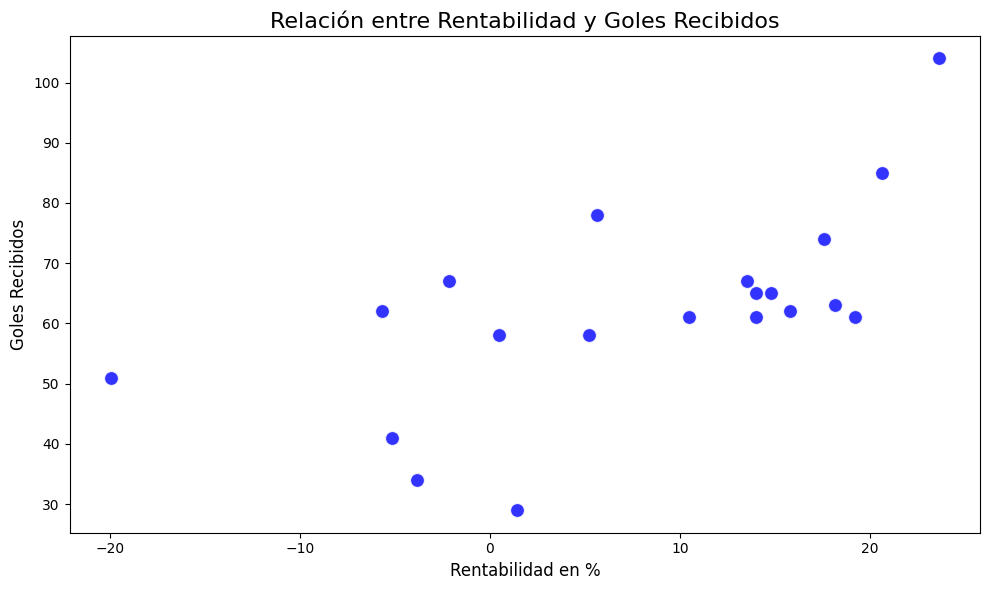

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=resultados_totales_con_rentabilidad["Rentabilidad(%)"],
    y=resultados_totales_con_rentabilidad["GolesRecibidos"],
    color="blue",
    alpha=0.8,
    s=100
)
plt.title("Relación entre Rentabilidad y Goles Recibidos", fontsize=16)
plt.xlabel("Rentabilidad en %", fontsize=12)
plt.ylabel("Goles Recibidos", fontsize=12)
plt.tight_layout()
plt.show()

### Resultados  
Al contrario de lo que cabría esperar, los **equipos que más goles marcan** parecen tener las **peores rentabilidades** para el mercado de más de 2.5 goles. Esto puede deberse a que el ser equipos tan goleadores hace que las cuotas de este mercado sean muy bajas, ya que se espera que en estos partidos haya muchos goles. Y de hecho, así es, pero las cuotas tan bajas de estos equipos hacen que no sean rentables.  

Sin embargo, sucede al contrario: **los equipos que más goles encajan** son los que **mejor rentabilidad** presentan en el mercado de más de 2.5 goles, al menos, en esta temporada. Para sacar conclusiones más sólidas, se debería hacer un análisis de, al menos, las últimas 3-5 temporadas para corroborar que esta correlación se mantiene.  

## Resultados finales  

Después de analizar los datos de la temporada 23/24 de la Premier League, buscando aquellos factores importantes y a tener en cuenta que influyen en la clasificación, se podría sacar las siguientes conclusiones:  

- El rendimiento como local es bastante superior al rendimiento como visitante.  
- El *goal average* y los goles a favor pueden ser un buen predictor de la clasificación de un equipo: a mayor sean, más posibilidades de quedar arriba en la tabla.  
- El resto de estadísticas no son tan relevantes, sólo por el hecho de que el potencial ofensivo está relacionado con los goles.  
- Si nos basamos en el rendimiento como local genérico, tras ver que es superior, y apostamos en todos los partidos a la victoria del equipo de casa, no conseguiremos la rentabilidad que esperamos. Sin embargo, podríamos conseguir rentabilidad si hubiéramos apostado por los 5 mejores equipos basados en su estadísticas como local.  
- Si queremos rentabilidad apostando por la cantidad de goles en los partidos, los mejores equipos para hacerlo habrían sido aquellos que encajan más goles (*los equipos de final de tabla*), siendo mucho menos rentables, incluso negativos, los equipos top, aunque tengan el mejor *goal average* y más goles anotados.